# Introduction

This tutorial is designed for performing the calculations in the tutorial, without any explantory text. For more information and explanations see https://sissopp_developers.gitlab.io/sissopp/tutorial/tutorial.html

Throughout this notebook we will also reduce the computational load of the calculations because otherwise the calculations are too expensive to run in a notebook in a reasonable time period.

In [1]:
import os

data_csv_lines = """# Material,E_RS - E_ZB (eV),Z_A (nuc_charge) ,Z_B (nuc_charge) ,period_A,period_B,IP_A (eV_IP) ,IP_B (eV_IP) ,EA_A (eV_IP),EA_B (eV_IP) ,E_HOMO_A (eV) ,E_HOMO_B (eV) ,E_LUMO_A (eV),E_LUMO_B (eV) , r_s_A (AA) , r_s_B (AA) , r_p_A (AA) , r_p_B (AA) , r_d_A (AA) , r_d_B (AA), r_sigma (AA) , r_pi (AA)
AgBr,-0.030033416711376,47,35,5,4,-8.0580997467,-12.649600029,-1.66659998894,-3.73930001259,-4.71000003815,-8.00100040436,-0.479000002146,0.708000004292,1.32000005245,0.75,1.87999999523,0.879999995232,2.97000002861,1.87000000477,1.570000052448,0.689999938012
AgCl,-0.042797278205399,47,17,5,3,-8.0580997467,-13.9018001556,-1.66659998894,-3.97079992294,-4.71000003815,-8.69999980927,-0.479000002146,0.574000000954,1.32000005245,0.680000007153,1.87999999523,0.759999990463,2.97000002861,1.66999995708,1.760000050064,0.63999992609
AgF,-0.153757673178916,47,9,5,2,-8.0580997467,-19.4043006897,-1.66659998894,-4.27349996567,-4.71000003815,-11.2939996719,-0.479000002146,1.25100004673,1.32000005245,0.409999996424,1.87999999523,0.370000004768,2.97000002861,1.42999994755,2.420000046488,0.599999934436
AgI,0.036925419641193,47,53,5,5,-8.0580997467,-11.2571001053,-1.66659998894,-3.5134999752,-4.71000003815,-7.23600006104,-0.479000002146,0.212999999523,1.32000005245,0.899999976158,1.87999999523,1.07000005245,2.97000002861,1.72000002861,1.230000019072,0.730000019072
AlAs,0.213261849108676,13,33,3,4,-5.78049993515,-9.26189994812,-0.3125,-1.83920001984,-2.78399991989,-5.34100008011,0.694999992847,0.0640000030398,1.09000003338,0.850000023842,1.38999998569,1.03999996185,1.94000005722,2.01999998093,0.590000033378,0.489999890318
AlN,0.072949073169639,13,7,3,2,-5.78049993515,-13.5852003098,-0.3125,-1.86749994755,-2.78399991989,-7.2389998436,0.694999992847,3.0569999218,1.09000003338,0.540000021458,1.38999998569,0.509999990463,1.94000005722,1.53999996185,1.430000007149,0.329999983305
AlP,0.218958341475627,13,15,3,3,-5.78049993515,-9.75059986115,-0.3125,-1.91999995708,-2.78399991989,-5.59600019455,0.694999992847,0.182999998331,1.09000003338,0.829999983311,1.38999998569,0.97000002861,1.94000005722,1.76999998093,0.680000007149,0.439999997609
AlSb,0.156868733960437,13,51,3,5,-5.78049993515,-8.46829986572,-0.3125,-1.84669995308,-2.78399991989,-4.99100017548,0.694999992847,0.104999996722,1.09000003338,1,1.38999998569,1.23000001907,1.94000005722,2.05999994278,0.25,0.52999997138
AsGa,0.274277772419737,31,33,4,4,-5.81820011139,-9.26189994812,-0.108099997044,-1.83920001984,-2.73200011253,-5.34100008011,0.129999995232,0.0640000030398,0.990000009537,0.850000023842,1.33000004292,1.03999996185,2.16000008583,2.01999998093,0.430000066765,0.529999971391
AsB,0.874978183765052,5,33,2,4,-8.18999958038,-9.26189994812,-0.107400000095,-1.83920001984,-3.71499991417,-5.34100008011,2.24799990654,0.0640000030398,0.810000002384,0.850000023842,0.829999983311,1.03999996185,1.95000004768,2.01999998093,0.249999999997,0.209999918935
BN,1.71208026083627,5,7,2,2,-8.18999958038,-13.5852003098,-0.107400000095,-1.86749994755,-3.71499991417,-7.2389998436,2.24799990654,3.0569999218,0.810000002384,0.540000021458,0.829999983311,0.509999990463,1.95000004768,1.53999996185,0.589999973774,0.050000011922
BP,1.01922516119521,5,15,2,3,-8.18999958038,-9.75059986115,-0.107400000095,-1.91999995708,-3.71499991417,-5.59600019455,2.24799990654,0.182999998331,0.810000002384,0.829999983311,0.829999983311,0.97000002861,1.95000004768,1.76999998093,0.160000026226,0.160000026226
BSb,0.580849114368903,5,51,2,5,-8.18999958038,-8.46829986572,-0.107400000095,-1.84669995308,-3.71499991417,-4.99100017548,2.24799990654,0.104999996722,0.810000002384,1,0.829999983311,1.23000001907,1.95000004768,2.05999994278,0.590000033375,0.249999999997
BaO,-0.092998553867801,56,8,6,2,-5.51569986343,-16.4332008362,0.277999997139,-3.00589990616,-3.34599995613,-9.19699954987,-2.1289999485,2.54099988937,2.15000009537,0.460000008345,2.63000011444,0.430000007153,1.35000002384,2.22000002861,3.890000194312,0.510000020262
BaS,-0.319762429426191,56,16,6,3,-5.51569986343,-11.7951002121,0.277999997139,-2.84489989281,-3.34599995613,-7.10599994659,-2.1289999485,0.64200001955,2.15000009537,0.740000009537,2.63000011444,0.850000023842,1.35000002384,2.36999988556,3.190000176431,0.590000033375
BaSe,-0.343445134087233,56,34,6,4,-5.51569986343,-10.9460000992,0.277999997139,-2.75099992752,-3.34599995613,-6.65399980545,-2.1289999485,1.31599998474,2.15000009537,0.800000011921,2.63000011444,0.949999988079,1.35000002384,2.18000006676,3.03000020981,0.629999995228
BaTe,-0.375386809668271,56,52,6,5,-5.51569986343,-9.86670017242,0.277999997139,-2.66599988937,-3.34599995613,-6.10900020599,-2.1289999485,0.0989999994636,2.15000009537,0.939999997616,2.63000011444,1.13999998569,1.35000002384,1.83000004292,2.700000226504,0.680000007144
BeO,0.691837577232946,4,8,2,2,-9.459400177,-16.4332008362,0.630500018597,-3.00589990616,-5.59999990463,-9.19699954987,-2.09800004959,2.54099988937,1.08000004292,0.460000008345,1.21000003815,0.430000007153,2.88000011444,2.22000002861,1.400000065572,0.159999996422
BeS,0.506327674543172,4,16,2,3,-9.459400177,-11.7951002121,0.630500018597,-2.84489989281,-5.59999990463,-7.10599994659,-2.09800004959,0.64200001955,1.08000004292,0.740000009537,1.21000003815,0.850000023842,2.88000011444,2.36999988556,0.700000047691,0.240000009535
BeSe,0.49494044277526,4,34,2,4,-9.459400177,-10.9460000992,0.630500018597,-2.75099992752,-5.59999990463,-6.65399980545,-2.09800004959,1.31599998474,1.08000004292,0.800000011921,1.21000003815,0.949999988079,2.88000011444,2.18000006676,0.54000008107,0.279999971388
BeTe,0.468585910493857,4,52,2,5,-9.459400177,-9.86670017242,0.630500018597,-2.66599988937,-5.59999990463,-6.10900020599,-2.09800004959,0.0989999994636,1.08000004292,0.939999997616,1.21000003815,1.13999998569,2.88000011444,1.83000004292,0.210000097764,0.329999983304
C2,2.62860363913364,6,6,2,2,-10.8516998291,-10.8516998291,-0.87239998579,-0.87239998579,-5.41599988937,-5.41599988937,1.99199998379,1.99199998379,0.639999985695,0.639999985695,0.629999995232,0.629999995232,1.62999999523,1.62999999523,0,0.019999980926
CaO,-0.265219041319142,20,8,4,2,-6.4279999733,-16.4332008362,0.303900003433,-3.00589990616,-3.86400008202,-9.19699954987,-2.132999897,2.54099988937,1.75999999046,0.460000008345,2.31999993324,0.430000007153,0.680000007153,2.22000002861,3.189999908202,0.589999943972
CaS,-0.369133194537426,20,16,4,3,-6.4279999733,-11.7951002121,0.303900003433,-2.84489989281,-3.86400008202,-7.10599994659,-2.132999897,0.64200001955,1.75999999046,0.740000009537,2.31999993324,0.850000023842,0.680000007153,2.36999988556,2.489999890321,0.669999957085
CaSe,-0.360797734421794,20,34,4,4,-6.4279999733,-10.9460000992,0.303900003433,-2.75099992752,-3.86400008202,-6.65399980545,-2.132999897,1.31599998474,1.75999999046,0.800000011921,2.31999993324,0.949999988079,0.680000007153,2.18000006676,2.3299999237,0.709999918938
CaTe,-0.350456279076752,20,52,4,5,-6.4279999733,-9.86670017242,0.303900003433,-2.66599988937,-3.86400008202,-6.10900020599,-2.132999897,0.0989999994636,1.75999999046,0.939999997616,2.31999993324,1.13999998569,0.680000007153,1.83000004292,1.999999940394,0.759999930854
CdO,-0.084161358026904,48,8,5,2,-9.5813999176,-16.4332008362,0.838699996471,-3.00589990616,-5.95200014114,-9.19699954987,-1.30900001526,2.54099988937,1.23000001907,0.460000008345,1.74000000954,0.430000007153,2.59999990463,2.22000002861,2.080000013112,0.539999991662
CdS,0.072672795911785,48,16,5,3,-9.5813999176,-11.7951002121,0.838699996471,-2.84489989281,-5.95200014114,-7.10599994659,-1.30900001526,0.64200001955,1.23000001907,0.740000009537,1.74000000954,0.850000023842,2.59999990463,2.36999988556,1.379999995231,0.620000004775
CdSe,0.083571949086036,48,34,5,4,-9.5813999176,-10.9460000992,0.838699996471,-2.75099992752,-5.95200014114,-6.65399980545,-1.30900001526,1.31599998474,1.23000001907,0.800000011921,1.74000000954,0.949999988079,2.59999990463,2.18000006676,1.22000002861,0.659999966628
CdTe,0.114539532194613,48,52,5,5,-9.5813999176,-9.86670017242,0.838699996471,-2.66599988937,-5.95200014114,-6.10900020599,-1.30900001526,0.0989999994636,1.23000001907,0.939999997616,1.74000000954,1.13999998569,2.59999990463,1.83000004292,0.890000045304,0.709999978544
BrCs,-0.155867302994011,55,35,6,4,-4.00619983673,-12.649600029,-0.569599986076,-3.73930001259,-2.22000002861,-8.00100040436,-0.547999978065,0.708000004292,2.46000003815,0.75,3.16000008583,0.879999995232,1.97000002861,1.87000000477,3.990000128748,0.830000042912
ClCs,-0.15034615744662,55,17,6,3,-4.00619983673,-13.9018001556,-0.569599986076,-3.97079992294,-2.22000002861,-8.69999980927,-0.547999978065,0.574000000954,2.46000003815,0.680000007153,3.16000008583,0.759999990463,1.97000002861,1.66999995708,4.180000126364,0.78000003099
CsF,-0.10826331867429,55,9,6,2,-4.00619983673,-19.4043006897,-0.569599986076,-4.27349996567,-2.22000002861,-11.2939996719,-0.547999978065,1.25100004673,2.46000003815,0.409999996424,3.16000008583,0.370000004768,1.97000002861,1.42999994755,4.840000122788,0.740000039336
CsI,-0.162387474498246,55,53,6,5,-4.00619983673,-11.2571001053,-0.569599986076,-3.5134999752,-2.22000002861,-7.23600006104,-0.547999978065,0.212999999523,2.46000003815,0.899999976158,3.16000008583,1.07000005245,1.97000002861,1.72000002861,3.650000095372,0.870000123972
BrCu,0.152442639788205,29,35,4,4,-8.38879966736,-12.649600029,-1.6384999752,-3.73930001259,-4.85599994659,-8.00100040436,-0.64099997282,0.708000004292,1.20000004768,0.75,1.67999994755,0.879999995232,2.57999992371,1.87000000477,1.249999999998,0.609999895102
ClCu,0.156258713192074,29,17,4,3,-8.38879966736,-13.9018001556,-1.6384999752,-3.97079992294,-4.85599994659,-8.69999980927,-0.64099997282,0.574000000954,1.20000004768,0.680000007153,1.67999994755,0.759999990463,2.57999992371,1.66999995708,1.439999997614,0.55999988318
CuF,-0.017022272342729,29,9,4,2,-8.38879966736,-19.4043006897,-1.6384999752,-4.27349996567,-4.85599994659,-11.2939996719,-0.64099997282,1.25100004673,1.20000004768,0.409999996424,1.67999994755,0.370000004768,2.57999992371,1.42999994755,2.099999994038,0.519999891526
CuI,0.204674583263113,29,53,4,5,-8.38879966736,-11.2571001053,-1.6384999752,-3.5134999752,-4.85599994659,-7.23600006104,-0.64099997282,0.212999999523,1.20000004768,0.899999976158,1.67999994755,1.07000005245,2.57999992371,1.72000002861,0.909999966622,0.649999976162
GaN,0.433445239093999,31,7,4,2,-5.81820011139,-13.5852003098,-0.108099997044,-1.86749994755,-2.73200011253,-7.2389998436,0.129999995232,3.0569999218,0.990000009537,0.540000021458,1.33000004292,0.509999990463,2.16000008583,1.53999996185,1.270000040536,0.370000064378
GaP,0.348751797751902,31,15,4,3,-5.81820011139,-9.75059986115,-0.108099997044,-1.91999995708,-2.73200011253,-5.59600019455,0.129999995232,0.182999998331,0.990000009537,0.829999983311,1.33000004292,0.97000002861,2.16000008583,1.76999998093,0.520000040536,0.480000078682
GaSb,0.154625285096699,31,51,4,5,-5.81820011139,-8.46829986572,-0.108099997044,-1.84669995308,-2.73200011253,-4.99100017548,0.129999995232,0.104999996722,0.990000009537,1,1.33000004292,1.23000001907,2.16000008583,2.05999994278,0.090000033387,0.570000052453
Ge2,0.200852526060771,32,32,4,4,-7.56699991226,-7.56699991226,-0.949000000954,-0.949000000954,-4.04600000381,-4.04600000381,2.17499995232,2.17499995232,0.920000016689,0.920000016689,1.15999996662,1.15999996662,2.36999988556,2.36999988556,0.0,0.479999899862
CGe,0.811442880200048,32,6,4,2,-7.56699991226,-10.8516998291,-0.949000000954,-0.87239998579,-4.04600000381,-5.41599988937,2.17499995232,1.99199998379,0.920000016689,0.639999985695,1.15999996662,0.629999995232,2.36999988556,1.62999999523,0.810000002382,0.249999940394
GeSi,0.263210170178354,32,14,4,3,-7.56699991226,-7.75769996643,-0.949000000954,-0.992999970913,-4.04600000381,-4.16300010681,2.17499995232,0.439999997616,0.920000016689,0.939999997616,1.15999996662,1.12999999523,2.36999988556,1.88999998569,0.009999990463,0.429999947545
AsIn,0.134047575193108,49,33,5,4,-5.53739976883,-9.26189994812,-0.256300002337,-1.83920001984,-2.6970000267,-5.34100008011,0.368000000715,0.0640000030398,1.12999999523,0.850000023842,1.5,1.03999996185,3.1099998951,2.01999998093,0.740000009538,0.559999942778
InN,0.15372029269929,49,7,5,2,-5.53739976883,-13.5852003098,-0.256300002337,-1.86749994755,-2.6970000267,-7.2389998436,0.368000000715,3.0569999218,1.12999999523,0.540000021458,1.5,0.509999990463,3.1099998951,1.53999996185,1.579999983309,0.400000035765
InP,0.179193287229282,49,15,5,3,-5.53739976883,-9.75059986115,-0.256300002337,-1.91999995708,-2.6970000267,-5.59600019455,0.368000000715,0.182999998331,1.12999999523,0.829999983311,1.5,0.97000002861,3.1099998951,1.76999998093,0.829999983309,0.510000050069
InSb,0.078059873019811,49,51,5,5,-5.53739976883,-8.46829986572,-0.256300002337,-1.84669995308,-2.6970000267,-4.99100017548,0.368000000715,0.104999996722,1.12999999523,1,1.5,1.23000001907,3.1099998951,2.05999994278,0.39999997616,0.60000002384
BrK,-0.166175964193826,19,35,4,4,-4.43319988251,-12.649600029,-0.621299982071,-3.73930001259,-2.42600011826,-8.00100040436,-0.697000026703,0.708000004292,2.13000011444,0.75,2.44000005722,0.879999995232,1.78999996185,1.87000000477,2.940000176428,0.439999938012
ClK,-0.16446068021105,19,17,4,3,-4.43319988251,-13.9018001556,-0.621299982071,-3.97079992294,-2.42600011826,-8.69999980927,-0.697000026703,0.574000000954,2.13000011444,0.680000007153,2.44000005722,0.759999990463,1.78999996185,1.66999995708,3.130000174044,0.38999992609
FK,-0.146406098498119,19,9,4,2,-4.43319988251,-19.4043006897,-0.621299982071,-4.27349996567,-2.42600011826,-11.2939996719,-0.697000026703,1.25100004673,2.13000011444,0.409999996424,2.44000005722,0.370000004768,1.78999996185,1.42999994755,3.790000170468,0.349999934436
IK,-0.167039145162562,19,53,4,5,-4.43319988251,-11.2571001053,-0.621299982071,-3.5134999752,-2.42600011826,-7.23600006104,-0.697000026703,0.212999999523,2.13000011444,0.899999976158,2.44000005722,1.07000005245,1.78999996185,1.72000002861,2.600000143052,0.480000019072
BrLi,-0.032746212884376,3,35,2,4,-5.32910013199,-12.649600029,-0.698099970818,-3.73930001259,-2.87400007248,-8.00100040436,-0.977999985218,0.708000004292,1.64999997616,0.75,2,0.879999995232,6.92999982834,1.87000000477,2.019999980928,0.480000019072
ClLi,-0.038381482699151,3,17,2,3,-5.32910013199,-13.9018001556,-0.698099970818,-3.97079992294,-2.87400007248,-8.69999980927,-0.977999985218,0.574000000954,1.64999997616,0.680000007153,2,0.759999990463,6.92999982834,1.66999995708,2.209999978544,0.43000000715
FLi,-0.059488316863735,3,9,2,2,-5.32910013199,-19.4043006897,-0.698099970818,-4.27349996567,-2.87400007248,-11.2939996719,-0.977999985218,1.25100004673,1.64999997616,0.409999996424,2,0.370000004768,6.92999982834,1.42999994755,2.869999974968,0.390000015496
ILi,-0.021660936341505,3,53,2,5,-5.32910013199,-11.2571001053,-0.698099970818,-3.5134999752,-2.87400007248,-7.23600006104,-0.977999985218,0.212999999523,1.64999997616,0.899999976158,2,1.07000005245,6.92999982834,1.72000002861,1.679999947552,0.520000100132
MgO,-0.232274724316994,12,8,3,2,-8.03709983826,-16.4332008362,0.692499995232,-3.00589990616,-4.78200006485,-9.19699954987,-1.35800004005,2.54099988937,1.33000004292,0.460000008345,1.89999997616,0.430000007153,3.17000007629,2.22000002861,2.340000003582,0.599999934432
MgS,-0.086699504988246,12,16,3,3,-8.03709983826,-11.7951002121,0.692499995232,-2.84489989281,-4.78200006485,-7.10599994659,-1.35800004005,0.64200001955,1.33000004292,0.740000009537,1.89999997616,0.850000023842,3.17000007629,2.36999988556,1.639999985701,0.679999947545
MgSe,-0.055301801956375,12,34,3,4,-8.03709983826,-10.9460000992,0.692499995232,-2.75099992752,-4.78200006485,-6.65399980545,-1.35800004005,1.31599998474,1.33000004292,0.800000011921,1.89999997616,0.949999988079,3.17000007629,2.18000006676,1.48000001908,0.719999909398
MgTe,-0.004591286648065,12,52,3,5,-8.03709983826,-9.86670017242,0.692499995232,-2.66599988937,-4.78200006485,-6.10900020599,-1.35800004005,0.0989999994636,1.33000004292,0.939999997616,1.89999997616,1.13999998569,3.17000007629,1.83000004292,1.150000035774,0.769999921314
BrNa,-0.12642872788274,11,35,3,4,-5.22310018539,-12.649600029,-0.715699970722,-3.73930001259,-2.81900000572,-8.00100040436,-0.717999994755,0.708000004292,1.71000003815,0.75,2.59999990463,0.879999995232,6.57000017166,1.87000000477,2.679999947548,1.019999861712
ClNa,-0.132991985081389,11,17,3,3,-5.22310018539,-13.9018001556,-0.715699970722,-3.97079992294,-2.81900000572,-8.69999980927,-0.717999994755,0.574000000954,1.71000003815,0.680000007153,2.59999990463,0.759999990463,6.57000017166,1.66999995708,2.869999945164,0.96999984979
FNa,-0.145788137787804,11,9,3,2,-5.22310018539,-19.4043006897,-0.715699970722,-4.27349996567,-2.81900000572,-11.2939996719,-0.717999994755,1.25100004673,1.71000003815,0.409999996424,2.59999990463,0.370000004768,6.57000017166,1.42999994755,3.529999941588,0.929999858136
INa,-0.114838222187245,11,53,3,5,-5.22310018539,-11.2571001053,-0.715699970722,-3.5134999752,-2.81900000572,-7.23600006104,-0.717999994755,0.212999999523,1.71000003815,0.899999976158,2.59999990463,1.07000005245,6.57000017166,1.72000002861,2.339999914172,1.059999942772
BrRb,-0.163820531422971,37,35,5,4,-4.28889989853,-12.649600029,-0.590399980545,-3.73930001259,-2.3599998951,-8.00100040436,-0.704999983311,0.708000004292,2.24000000954,0.75,3.20000004768,0.879999995232,1.96000003815,1.87000000477,3.810000061988,1.090000033372
ClRb,-0.160503554077877,37,17,5,3,-4.28889989853,-13.9018001556,-0.590399980545,-3.97079992294,-2.3599998951,-8.69999980927,-0.704999983311,0.574000000954,2.24000000954,0.680000007153,3.20000004768,0.759999990463,1.96000003815,1.66999995708,4.000000059604,1.04000002145
FRb,-0.135595776984701,37,9,5,2,-4.28889989853,-19.4043006897,-0.590399980545,-4.27349996567,-2.3599998951,-11.2939996719,-0.704999983311,1.25100004673,2.24000000954,0.409999996424,3.20000004768,0.370000004768,1.96000003815,1.42999994755,4.660000056028,1.000000029796
IRb,-0.167201442120131,37,53,5,5,-4.28889989853,-11.2571001053,-0.590399980545,-3.5134999752,-2.3599998951,-7.23600006104,-0.704999983311,0.212999999523,2.24000000954,0.899999976158,3.20000004768,1.07000005245,1.96000003815,1.72000002861,3.470000028612,1.130000114432
Si2,0.279165821548304,14,14,3,3,-7.75769996643,-7.75769996643,-0.992999970913,-0.992999970913,-4.16300010681,-4.16300010681,0.439999997616,0.439999997616,0.939999997616,0.939999997616,1.12999999523,1.12999999523,1.88999998569,1.88999998569,0.0,0.379999995228
CSi,0.669023727235981,14,6,3,2,-7.75769996643,-10.8516998291,-0.992999970913,-0.87239998579,-4.16300010681,-5.41599988937,0.439999997616,1.99199998379,0.939999997616,0.639999985695,1.12999999523,0.629999995232,1.88999998569,1.62999999523,0.800000011919,0.199999988077
Sn2,0.016963899193797,50,50,5,5,-7.04279994965,-7.04279994965,-1.03919994831,-1.03919994831,-3.86599993706,-3.86599993706,0.00800000037998,0.00800000037998,1.05999994278,1.05999994278,1.34000003338,1.34000003338,2.02999997139,2.02999997139,0.0,0.5600001812
CSn,0.453537974142819,50,6,5,2,-7.04279994965,-10.8516998291,-1.03919994831,-0.87239998579,-3.86599993706,-5.41599988937,0.00800000037998,1.99199998379,1.05999994278,0.639999985695,1.34000003338,0.629999995232,2.02999997139,1.62999999523,1.129999995233,0.290000081063
GeSn,0.081663360237144,50,32,5,4,-7.04279994965,-7.56699991226,-1.03919994831,-0.949000000954,-3.86599993706,-4.04600000381,0.00800000037998,2.17499995232,1.05999994278,0.920000016689,1.34000003338,1.15999996662,2.02999997139,2.36999988556,0.319999992851,0.520000040531
SiSn,0.135108799106092,50,14,5,3,-7.04279994965,-7.75769996643,-1.03919994831,-0.992999970913,-3.86599993706,-4.16300010681,0.00800000037998,0.439999997616,1.05999994278,0.939999997616,1.34000003338,1.12999999523,2.02999997139,1.88999998569,0.329999983314,0.470000088214
OSr,-0.22030662317411,38,8,5,2,-6.03159999847,-16.4332008362,0.343100011349,-3.00589990616,-3.64100003242,-9.19699954987,-1.3789999485,2.54099988937,1.90999996662,0.460000008345,2.54999995232,0.430000007153,1.20000004768,2.22000002861,3.569999903442,0.669999986892
SSr,-0.368434129930392,38,16,5,3,-6.03159999847,-11.7951002121,0.343100011349,-2.84489989281,-3.64100003242,-7.10599994659,-1.3789999485,0.64200001955,1.90999996662,0.740000009537,2.54999995232,0.850000023842,1.20000004768,2.36999988556,2.869999885561,0.750000000005
SeSr,-0.3745109517331,38,34,5,4,-6.03159999847,-10.9460000992,0.343100011349,-2.75099992752,-3.64100003242,-6.65399980545,-1.3789999485,1.31599998474,1.90999996662,0.800000011921,2.54999995232,0.949999988079,1.20000004768,2.18000006676,2.70999991894,0.789999961858
SrTe,-0.379294725862565,38,52,5,5,-6.03159999847,-9.86670017242,0.343100011349,-2.66599988937,-3.64100003242,-6.10900020599,-1.3789999485,0.0989999994636,1.90999996662,0.939999997616,2.54999995232,1.13999998569,1.20000004768,1.83000004292,2.379999935634,0.839999973773999
OZn,0.101968176768423,30,8,4,2,-10.1354999542,-16.4332008362,1.08070003986,-3.00589990616,-6.21700000763,-9.19699954987,-1.19400000572,2.54099988937,1.10000002384,0.460000008345,1.54999995232,0.430000007153,2.25,2.22000002861,1.759999960662,0.479999929672
SZn,0.275813325606578,30,16,4,3,-10.1354999542,-11.7951002121,1.08070003986,-2.84489989281,-6.21700000763,-7.10599994659,-1.19400000572,0.64200001955,1.10000002384,0.740000009537,1.54999995232,0.850000023842,2.25,2.36999988556,1.059999942781,0.559999942785
SeZn,0.263136899280653,30,34,4,4,-10.1354999542,-10.9460000992,1.08070003986,-2.75099992752,-6.21700000763,-6.65399980545,-1.19400000572,1.31599998474,1.10000002384,0.800000011921,1.54999995232,0.949999988079,2.25,2.18000006676,0.89999997616,0.599999904638
TeZn,0.245001295174006,30,52,4,5,-10.1354999542,-9.86670017242,1.08070003986,-2.66599988937,-6.21700000763,-6.10900020599,-1.19400000572,0.0989999994636,1.10000002384,0.939999997616,1.54999995232,1.13999998569,2.25,1.83000004292,0.569999992854,0.649999916554
"""
data_file = "sissopp_tut_data.csv"
open(data_file, "w").write(data_csv_lines)
print(f"Data file now written to {data_file}")

os.environ["SISSOPP_TUT_DAT_FILE"] = data_file

Data file now written to sissopp_tut_data.csv


# The Command Line Interface

In [2]:
import json
import numpy as np

In [3]:
# In the online tutorial this would be 4, but we are using 3 to make it less expensive
max_dim = 3

sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": 10,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [4]:
%%bash
sisso++ sisso.json

time input_parsing: 0.001333 s
Time to generate feat space: 8.89769 s
Projection time: 0.320125 s
Time to get best features on rank : 5.00679e-05 s
Complete final combination/selection from all ranks: 0.000247002 s
Time for SIS: 0.431573 s
Time for l0-norm: 0.0478008 s
Projection time: 0.386925 s
Time to get best features on rank : 8.58307e-05 s
Complete final combination/selection from all ranks: 0.000281096 s
Time for SIS: 0.521026 s
Time for l0-norm: 0.00281286 s
Projection time: 0.384946 s
Time to get best features on rank : 4.29153e-05 s
Complete final combination/selection from all ranks: 0.000246048 s
Time for SIS: 0.509139 s
Time for l0-norm: 0.0125239 s
Train RMSE: 0.125912 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0931541 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0725522 eV
c0 + a0 * ((r_d_B * Z_A) / (|r_p_B - r_s_B|)) + a1 * ((|EA_B - IP_A|) * (|r_sigma - r_s_B|)) + a2 * ((E_HO

In [5]:
feature_space_sis_sum_lines ="""# FEAT_ID     Score                   Feature Expression
0             0.90609543772524781     ((E_HOMO_B / r_p_A) / (r_sigma + r_s_B))
1             0.908165571792444948    ((E_HOMO_B / r_p_A) / (r_s_A^2))
2             0.908873529961838345    ((IP_B / r_p_A) / (r_sigma + r_s_B))
3             0.909420884428965848    ((r_s_B / r_p_B) / (r_p_A^2))
4             0.911915092723797449    ((IP_B / r_s_A) / (r_p_A * r_s_A))
5             0.912838504121724292    ((IP_B / r_p_A) / (r_sigma + r_p_B))
6             0.913335178071393861    ((IP_B / r_p_A) / (r_sigma + r_d_B))
7             0.913575821723830783    ((r_s_B / r_p_A) / (r_pi + r_p_B))
8             0.919657911026942054    ((r_pi - r_s_A) / (r_s_A^3))
9             0.920868624862486329    ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))
#-----------------------------------------------------------------------
10            0.406210357359531482    ((E_HOMO_A / r_p_A) * (|r_sigma - r_s_B|))
11            0.407087919942909271    ((IP_B / r_d_A) / (|r_sigma - r_d_A|))
12            0.412833543057879893    ((E_HOMO_B / r_d_A) / (|r_sigma - r_d_A|))
13            0.41361378660926168     ((IP_A / r_s_A) * (|r_sigma - r_s_B|))
14            0.420792823945546901    ((E_HOMO_A / r_s_A) * (|r_sigma - r_s_B|))
15            0.429583630959742058    (|(|r_sigma - r_d_B|) - r_sigma|)
16            0.449774820279551124    ((EA_B - IP_A) * (|r_sigma - r_p_B|))
17            0.450756313666295927    ((|EA_B - IP_A|) * (|r_sigma - r_p_B|))
18            0.474277869552096332    ((EA_B - IP_A) * (|r_sigma - r_s_B|))
19            0.477894637470377692    ((|EA_B - IP_A|) * (|r_sigma - r_s_B|))
#-----------------------------------------------------------------------
20            0.364460897568853914    ((|period_B - period_A|) / (EA_B * Z_B))
21            0.36569789330249447     ((Z_A / r_d_A) / (Z_B^6))
22            0.367930264720841615    ((r_sigma * IP_A) / (r_p_A * EA_B))
23            0.371280945046756461    ((r_sigma * IP_A) / (r_pi * EA_B))
24            0.371428608061152965    ((r_d_B * Z_A) / (|r_p_B - r_s_B|))
25            0.372118309722368978    ((|Z_B - Z_A|) / (r_pi * Z_B))
26            0.376740768063881959    ((r_sigma / EA_B) / (|r_p_B - r_s_B|))
27            0.38222896050736499     ((|Z_B - Z_A|) / (r_pi * EA_B))
28            0.394109435179661349    ((|period_B - period_A|) / (r_pi * EA_B))
29            0.39445559217196724     ((r_sigma * E_HOMO_A) / (r_pi * EA_B))
#-----------------------------------------------------------------------"""
sis_summary = open("feature_space/SIS_summary.txt").readlines()
for line_correct, line_actual in zip(feature_space_sis_sum_lines.split("\n"), sis_summary):
    if (line_correct[0] == "#") and (line_actual[0] == "#"):
        continue
    elif (line_correct[0] == "#") or (line_actual[0] == "#"):
        raise ValueError("Files don't match")

    score_correct = round(float(line_correct.split()[1]), 10)
    score_actual = round(float(line_actual.split()[1]), 10)
    assert score_correct == score_actual

In [6]:
model_file_lines = """# c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))
# Property Label: $E_{RS} - E_{ZB}$; Unit of the Property: eV
# RMSE: 0.0931540779192557; Max AE: 0.356632500670745
# Coefficients
# Task   a0                      a1                      c0
# all , -3.208426383962958e-02, -2.400330764129759e-01, -2.869432663392750e-01,
# Feature Rung, Units, and Expressions
# 0;  2; AA * eV_IP;                                       7|4|sub|18|13|abd|mult; ((EA_B - IP_A) * (|r_sigma - r_s_B|)); $\left(\left(EA_{B} - IP_{A}\right) \left(\left|r_{sigma} - r_{s, B}\right|\right)\right)$; ((EA_B - IP_A) .* abs(r_sigma - r_s_B)); EA_B,IP_A,r_sigma,r_s_B
# 1;  2; AA^-2 * eV;                                       9|14|div|18|15|add|div; ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B)); $\left(\frac{ \left(\frac{ E_{HOMO, B} }{ r_{p, A} } \right) }{ \left(r_{sigma} + r_{p, B}\right) } \right)$; ((E_HOMO_B ./ r_p_A) ./ (r_sigma + r_p_B)); E_HOMO_B,r_p_A,r_sigma,r_p_B
# Number of Samples Per Task
# Task, n_mats_train
# all , 82

# Sample ID , Property Value        ,  Property Value (EST) ,  Feature 0 Value      ,  Feature 1 Value
AgBr        , -3.003341671137600e-02,  1.639017458701624e-02,  3.541416008482608e+00, -1.737082125260779e+00
AgCl        , -4.279727820539900e-02,  1.221788989673778e-02,  4.414283985050924e+00, -1.836372781878862e+00
AgF         , -1.537576731789160e-01, -1.416891410786941e-02,  7.607045749342502e+00, -2.153206644755162e+00
AgI         ,  3.692541964119300e-02,  6.662284759163006e-02,  1.499718119621954e+00, -1.673450475112165e+00
AlAs        ,  2.132618491086760e-01,  2.460156857673837e-01,  1.024737940396364e+00, -2.357328927365386e+00
AlN         ,  7.294907316963900e-02,  2.456878076268038e-01,  3.482569932972883e+00, -2.684491554934336e+00
AlP         ,  2.189583414756270e-01,  2.801436096644385e-01,  5.790749046839015e-01, -2.439939014991684e+00
AlSb        ,  1.568687339604370e-01,  2.007443516059665e-01,  2.950349986552500e+00, -2.426113242539595e+00
AsGa        ,  2.742777724197370e-01,  3.151675906408351e-01,  1.671179867660379e+00, -2.731829473573980e+00
AsB         ,  8.749781837650520e-01,  7.881634596496340e-01,  3.810479887758816e+00, -4.988325717257844e+00
BN          ,  1.712080260836270e+00,  1.606089893577266e+00,  3.161246801594280e-01, -7.928806379528248e+00
BP          ,  1.019225161195210e+00,  1.010436354881370e+00,  4.200899478533967e+00, -5.966520988922634e+00
BSb         ,  5.808491143689030e-01,  4.226792460264598e-01,  2.600752635485375e+00, -3.303985258847382e+00
BaO         , -9.299855386780100e-02, -3.688421176160839e-01,  8.608614320176068e+00, -8.094809464135576e-01
BaS         , -3.197624294261910e-01, -3.363542918017661e-01,  6.543460373759491e+00, -6.687873437791405e-01
BaSe        , -3.434451340872330e-01, -3.321656670638599e-01,  6.165281404183006e+00, -6.356878675764703e-01
BaTe        , -3.753868096682710e-01, -3.026651587599424e-01,  5.015472606607728e+00, -6.048993586215626e-01
BeO         ,  6.918375772329460e-01,  5.153912242420119e-01,  6.066290623904059e+00, -4.153456575173075e+00
BeS         ,  5.063276745431720e-01,  6.140186443576880e-01,  2.645797589979559e-01, -3.788855982192108e+00
BeSe        ,  4.949404427752600e-01,  5.429907890755682e-01,  1.744183600985631e+00, -3.690720110296145e+00
BeTe        ,  4.685859104938570e-01,  4.516260835242951e-01,  4.959181529624447e+00, -3.739822244098568e+00
C2          ,  2.628603639133640e+00,  2.783574944051988e+00,  6.386751756964515e+00, -1.364575452594942e+01
CaO         , -2.652190413191420e-01, -3.238274257878371e-01,  9.342332840592833e+00, -1.095089544385995e+00
CaS         , -3.691331945374260e-01, -2.680040315596177e-01,  6.270424713694642e+00, -9.170452629688933e-01
CaSe        , -3.607977344217940e-01, -2.575530743234562e-01,  5.625809745654779e+00, -8.744218061257983e-01
CaTe        , -3.504562790767520e-01, -2.135956642585606e-01,  3.987719873696632e+00, -8.385955037322098e-01
CdO         , -8.416135802690400e-02, -1.232460775026244e-01,  1.065231004987821e+01, -2.105829423728353e+00
CdS         ,  7.267279591178499e-02,  1.431422536464881e-02,  4.311359919493231e+00, -1.831348860072292e+00
CdSe        ,  8.357194908603600e-02,  4.401882316506024e-02,  2.868768109826145e+00, -1.762275469514607e+00
CdTe        ,  1.145395321946130e-01,  1.171042634651223e-01,  3.457696716299031e-01, -1.729517037320575e+00
BrCs        , -1.558673029940110e-01, -1.898926962890557e-01,  8.647554645764165e-01, -5.199100657183604e-01
ClCs        , -1.503461574466200e-01, -1.571430901173148e-01,  1.238997024850578e-01, -5.573207199827011e-01
CsF         , -1.082633186742900e-01, -8.428877325507279e-02, -1.184139604981316e+00, -6.859981467376031e-01
CsI         , -1.623874744982460e-01, -2.139647446584292e-01,  1.354924677944221e+00, -4.851426489675994e-01
BrCu        ,  1.524426397882050e-01,  1.751625662935415e-01,  2.324749827375701e+00, -2.235915680770981e+00
ClCu        ,  1.562587131920740e-01,  1.703409819257667e-01,  3.357679763615902e+00, -2.353896138537911e+00
CuF         , -1.702227234272900e-02,  1.432152572174888e-01,  6.954856486036995e+00, -2.721708123665148e+00
CuI         ,  2.046745832631130e-01,  2.336424208281593e-01,  4.875295043074224e-02, -2.175324740635570e+00
GaN         ,  4.334452390939990e-01,  3.544948246079955e-01,  2.884011194974658e+00, -3.057784693724841e+00
GaP         ,  3.487517977519020e-01,  3.520992885010393e-01,  1.208441824761596e+00, -2.823837994787984e+00
GaSb        ,  1.546252850966990e-01,  2.794927768939737e-01,  3.614065011465625e+00, -2.842902606558420e+00
Ge2         ,  2.008525260607710e-01,  2.394501685804619e-01,  6.088560028849320e+00, -3.006837274572150e+00
CGe         ,  8.114428802000480e-01,  4.548103795293029e-01,  1.138082099212689e+00, -3.242337197194732e+00
GeSi        ,  2.632101701783540e-01,  2.725388874377264e-01,  6.113819992476531e+00, -3.148064336698105e+00
AsIn        ,  1.340475751931080e-01,  1.801608579254571e-01,  4.068020252879492e-01, -2.000374593993287e+00
InN         ,  1.537202926992900e-01,  1.448590522634359e-01,  3.816695674128193e+00, -2.309090888179985e+00
InP         ,  1.791932872292820e-01,  2.105475238127370e-01,  7.234639577287595e-12, -2.072592650924130e+00
InSb        ,  7.805987301981100e-02,  1.319903471163014e-01,  2.214419977436284e+00, -2.041308871200640e+00
BrK         , -1.661759641938260e-01, -1.296547837765485e-01,  1.519640837548166e+00, -8.584026968916481e-01
ClK         , -1.644606802110500e-01, -1.032766020647462e-01,  1.132879978116893e+00, -9.165998606480857e-01
FK          , -1.464060984981190e-01, -3.718539436956973e-02,  5.397857467140130e-01, -1.112665405432063e+00
IK          , -1.670391451625620e-01, -1.431459979136605e-01,  1.563489995919397e+00, -8.080581929117355e-01
BrLi        , -3.274621288437600e-02, -2.060136493312719e-02,  2.019046121317332e+00, -1.379482839678231e+00
ClLi        , -3.838148269915100e-02, -2.057167653941297e-03,  2.078199280986889e+00, -1.464646447821141e+00
FLi         , -5.948831686373500e-02,  4.809501062409577e-02,  2.596776386498242e+00, -1.742901194835849e+00
ILi         , -2.166093634150500e-02, -1.658372988181873e-02,  1.416168070359142e+00, -1.315636374733589e+00
MgO         , -2.322747243169940e-01, -1.709637107152052e-01,  9.458655848384394e+00, -1.747482354099491e+00
MgS         , -8.669950498824600e-02, -7.634077484966063e-02,  4.672979827143721e+00, -1.502008033928903e+00
MgSe        , -5.530180195637500e-02, -5.633708966390212e-02,  3.594547977146389e+00, -1.441195553246026e+00
MgTe        , -4.591286648065000e-03,  1.388515614782964e-02,  1.127931194217332e+00, -1.404045098915806e+00
BrNa        , -1.264287278827400e-01, -1.713365131268951e-01,  2.863734255675713e+00, -8.644123624074346e-01
ClNa        , -1.329919850813890e-01, -1.536717536375947e-01,  2.742537497136659e+00, -9.218054972107542e-01
FNa         , -1.457881377878040e-01, -1.146505476072913e-01,  2.962752633454122e+00, -1.113806729932952e+00
INa         , -1.148382221872450e-01, -1.700256955871654e-01,  2.461824196702322e+00, -8.161516351556487e-01
BrRb        , -1.638205314229710e-01, -2.129364033898979e-01,  1.681775685044998e+00, -5.331156841370923e-01
ClRb        , -1.605035540778770e-01, -1.837284810776369e-01,  1.056091935643463e+00, -5.711659393468355e-01
FRb         , -1.355957769847010e-01, -1.206203707726129e-01,  6.544971557289886e-02, -7.016649706208032e-01
IRb         , -1.672014421201310e-01, -2.313261599637700e-01,  1.992777843630929e+00, -4.980726751118079e-01
Si2         ,  2.791658215483040e-01,  2.916041179034760e-01,  6.358817979658935e+00, -3.260239754057512e+00
CSi         ,  6.690237272359810e-01,  4.822282210388984e-01,  1.101648177462507e+00, -3.351692484156472e+00
Sn2         ,  1.696389919379700e-02,  2.567935768664463e-02,  6.363815657894407e+00, -2.153040623998902e+00
CSn         ,  4.535379741428190e-01,  1.672793503038666e-01,  3.023496041144674e+00, -2.296472092858216e+00
GeSn        ,  8.166336023714400e-02,  8.544807638632528e-02,  3.656280114481603e+00, -2.040137159045913e+00
SiSn        ,  1.351087991060920e-01,  1.054171704626117e-01,  3.690378073553809e+00, -2.127887990332651e+00
OSr         , -2.203066231741100e-01, -3.724240237555350e-01,  9.409926969679084e+00, -9.016666595490496e-01
SSr         , -3.684341299303920e-01, -3.249109578073314e-01,  6.787670829981468e+00, -7.491039692724043e-01
SeSr        , -3.745109517331000e-01, -3.168489728859340e-01,  6.265945830481024e+00, -7.129540446704449e-01
SrTe        , -3.792947258625650e-01, -2.790737245833743e-01,  4.846463948497374e+00, -6.805927425088493e-01
OZn         ,  1.019681767684230e-01,  6.602587728853203e-02,  9.268479722491282e+00, -2.709382815714799e+00
SZn         ,  2.758133256065780e-01,  2.143486874814196e-01,  2.332991532953503e+00, -2.400270322363168e+00
SeZn        ,  2.631368992806530e-01,  2.463580576975095e-01,  7.384497385908948e-01, -2.320488278555971e+00
TeZn        ,  2.450012951740060e-01,  1.776248032825628e-01,  2.763715059556858e+00, -2.304848319397327e+00"""

model_file = open("models/train_dim_2_model_0.dat").readlines()
for line_correct, line_actual in zip(model_file_lines.split("\n"), model_file):
    if (len(line_correct) == 0) and (len(line_correct) == 0):
        continue
    elif (len(line_correct) == 0) or (len(line_correct) == 0):
        raise ValueError("Files don't match")
        
    if (line_correct[0] == "#") and (line_actual[0] == "#"):
        continue
    elif (line_correct[0] == "#") or (line_actual[0] == "#"):
        raise ValueError("Files don't match")
    np.all([np.round(float(lc), 10) == np.round(float(la), 10) for lc, la in zip(line_correct.split(",")[1:], line_actual.split(",")[1:])])
    assert score_correct == score_actual

In [7]:
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": 10,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.10,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [8]:
%%bash
for ii in `seq -f "%02g" 0 9`; do
    mkdir cv_$ii;
    cp sisso.json $SISSOPP_TUT_DAT_FILE cv_$ii;
    cd cv_$ii;
    sisso++;
    cd ../;
done

mkdir: cannot create directory ‘cv_00’: File exists


time input_parsing: 0.00292206 s
Time to generate feat space: 9.13179 s
Projection time: 0.318585 s
Time to get best features on rank : 4.88758e-05 s
Complete final combination/selection from all ranks: 0.00030303 s
Time for SIS: 0.428906 s
Time for l0-norm: 0.035872 s
Projection time: 0.369612 s
Time to get best features on rank : 4.19617e-05 s
Complete final combination/selection from all ranks: 0.000216007 s
Time for SIS: 0.480189 s
Time for l0-norm: 0.00213408 s
Projection time: 0.353424 s
Time to get best features on rank : 4.50611e-05 s
Complete final combination/selection from all ranks: 0.000224113 s
Time for SIS: 0.485745 s
Time for l0-norm: 0.012357 s
Train RMSE: 0.117722 eV; Test RMSE: 0.322487 eV
c0 + a0 * ((IP_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0845384 eV; Test RMSE: 0.2542 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((IP_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0687796 eV; Test RMSE: 0.171885 eV
c0 + a0 * ((r_d_B^2) / (|r_p_B - r_s_B|)) + a

Time to get best features on rank : 7.51019e-05 s
Complete final combination/selection from all ranks: 0.000279903 s
Time for SIS: 0.453357 s
Time for l0-norm: 0.0110891 s
Train RMSE: 0.122637 eV; Test RMSE: 0.15394 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0943118 eV; Test RMSE: 0.0838404 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0708865 eV; Test RMSE: 0.0962514 eV
c0 + a0 * ((r_sigma / EA_B) / (|r_p_B - r_s_B|)) + a1 * ((|EA_B - IP_A|) * (|r_sigma - r_s_B|)) + a2 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

time input_parsing: 0.001544 s
Time to generate feat space: 8.07736 s
Projection time: 0.219329 s
Time to get best features on rank : 9.48906e-05 s
Complete final combination/selection from all ranks: 0.000427008 s
Time for SIS: 0.323034 s
Time for l0-norm: 0.039494 s
Projection time: 0.251886 s
Time to get best features on rank : 4.91142e-05 s
Complete final combination/selection fro

[0.1761747  0.13251197 0.11218378]
[0.02473025 0.02139842 0.01134136]


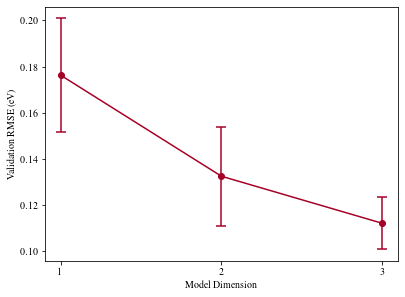

In [9]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
from sissopp.postprocess.plot.cv_error_plot import plot_validation_rmse

plot_validation_rmse("cv*", "cv_10._error.png")

mean_val_rmse, var_val_rmse = jackknife_cv_conv_est("cv*")
print(mean_val_rmse)
print(np.sqrt(var_val_rmse))

In [10]:
%%bash
for ii in `seq -f "%02g" 10 24`; do
    mkdir cv_$ii;
    cp sisso.json $SISSOPP_TUT_DAT_FILE cv_$ii;
    cd cv_$ii;
    sisso++;
    cd ../;
done

time input_parsing: 0.00209093 s
Time to generate feat space: 8.51814 s
Projection time: 0.298307 s
Time to get best features on rank : 6.69956e-05 s
Complete final combination/selection from all ranks: 0.00026083 s
Time for SIS: 0.395796 s
Time for l0-norm: 0.045943 s
Projection time: 0.247148 s
Time to get best features on rank : 6.29425e-05 s
Complete final combination/selection from all ranks: 0.000237942 s
Time for SIS: 0.344341 s
Time for l0-norm: 0.00244784 s
Projection time: 0.257836 s
Time to get best features on rank : 3.69549e-05 s
Complete final combination/selection from all ranks: 0.000162125 s
Time for SIS: 0.35849 s
Time for l0-norm: 0.0101418 s
Train RMSE: 0.122101 eV; Test RMSE: 0.174703 eV
c0 + a0 * ((r_pi - r_s_A) / (r_s_A^3))

Train RMSE: 0.0838029 eV; Test RMSE: 0.234841 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((IP_B + IP_A) / (r_s_A^3))

Train RMSE: 0.0614072 eV; Test RMSE: 0.148386 eV
c0 + a0 * ((|period_B - period_A|) / (r_pi * EA_B)) + a1 * (

Time for SIS: 0.463076 s
Time for l0-norm: 0.0124838 s
Train RMSE: 0.122381 eV; Test RMSE: 0.29283 eV
c0 + a0 * ((IP_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0902068 eV; Test RMSE: 0.951466 eV
c0 + a0 * ((r_pi / EA_A) + (r_d_A / EA_B)) + a1 * ((IP_A / r_s_A) / sqrt(r_pi))

Train RMSE: 0.0743886 eV; Test RMSE: 0.982299 eV
c0 + a0 * ((r_pi * E_HOMO_B) / (|r_sigma - r_d_A|)) + a1 * ((r_p_A - r_s_A) / EA_A) + a2 * ((IP_A / r_s_A) / sqrt(r_pi))

time input_parsing: 0.00205398 s
Time to generate feat space: 9.48241 s
Projection time: 0.349917 s
Time to get best features on rank : 5.10216e-05 s
Complete final combination/selection from all ranks: 0.00023818 s
Time for SIS: 0.459071 s
Time for l0-norm: 0.0331531 s
Projection time: 0.411778 s
Time to get best features on rank : 5.91278e-05 s
Complete final combination/selection from all ranks: 0.000168085 s
Time for SIS: 0.528112 s
Time for l0-norm: 0.00236702 s
Projection time: 0.414135 s
Time to get best features on rank : 3.50475e-05 s

[0.16699581 0.16257305 0.14293413]
[0.01392745 0.03525848 0.03597368]


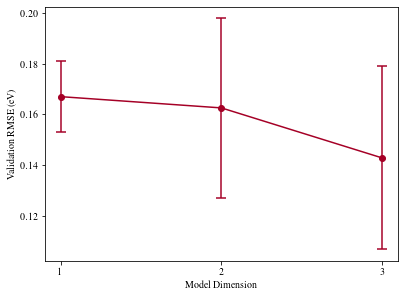

In [11]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
from sissopp.postprocess.plot.cv_error_plot import plot_validation_rmse

plot_validation_rmse("cv*", "cv_25._error.png")

mean_val_rmse, var_val_rmse = jackknife_cv_conv_est("cv*")
print(mean_val_rmse)
print(np.sqrt(var_val_rmse))

/home/purcell/bin/anaconda3/envs/sissopp_env/lib/python3.9/site-packages/sissopp/postprocess/plot/cv_error_plot.py:124: RuntimeWarning: Mean of empty slice
  validation_samp_mean = np.nanmean(validation_error, axis=1)
/tmp/ipykernel_2244/467443046.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_errors_dists("cv*", "error_cv_dist.png").show()


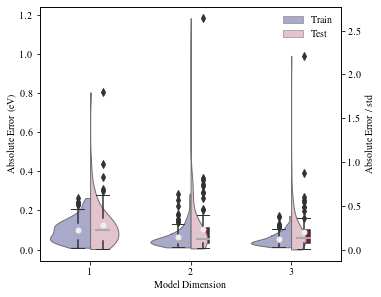

In [12]:
from sissopp.postprocess.plot.cv_error_plot import plot_errors_dists
plot_errors_dists("cv*", "error_cv_dist.png").show()

In [13]:
import pandas as pd
from sissopp.postprocess.get_model_errors import get_model_errors

df = pd.read_csv(data_file, index_col=0)

te, ve = get_model_errors("cv*", True)
max_err_ind = np.nanmean(ve, axis=1).argmax(axis=0)
print(df.index[max_err_ind])

Index(['BeSe', 'BeSe', 'BeSe'], dtype='object', name='# Material')


/tmp/ipykernel_2244/929146597.py:7: RuntimeWarning: Mean of empty slice
  max_err_ind = np.nanmean(ve, axis=1).argmax(axis=0)


In [14]:
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": "SSSS",
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": "RRRR",
    "n_models_store": 1,
    "leave_out_frac": 0.10,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [15]:
%%bash

for ns in 10; do # Leaving out ns to reduce the calculation time
    for nr in 1 5 10; do
        export cv_direc=ns_"$ns"_nr_"$nr"
        mkdir $cv_direc;
        cp $SISSOPP_TUT_DAT_FILE $cv_direc/;
        sed "s/SSSS/$ns/g" sisso.json > $cv_direc/sisso.json;
        sed -i "s/RRRR/$nr/g" $cv_direc/sisso.json;
    done
done

if [ -d cv_00 ]; then
    mv cv* ns_10_nr_10
fi

In [16]:
%%bash
export CV_N_RUN=4 # This should be 99, but we are using 4 to reduce computational time

for direc in ns_*; do
    cd $direc;
    pwd;
    if [ ! -d cv_00 ]; then
        for ii in `seq -f "%02g" 0 $CV_N_RUN`; do
            mkdir cv_$ii;
            cp sisso.json $SISSOPP_TUT_DAT_FILE cv_$ii;
            cd cv_$ii;
            sisso++;
            cd ../;
        done
    fi
    cd ../;
done

/home/purcell/git/sissopp/docs/tutorial/notebook/ns_10_nr_1
time input_parsing: 0.00147891 s
Time to generate feat space: 8.05494 s
Projection time: 0.215067 s
Time to get best features on rank : 4.1008e-05 s
Complete final combination/selection from all ranks: 0.000231981 s
Time for SIS: 0.312764 s
Time for l0-norm: 0.046756 s
Projection time: 0.256061 s
Time to get best features on rank : 3.40939e-05 s
Complete final combination/selection from all ranks: 0.000162125 s
Time for SIS: 0.353038 s
Time for l0-norm: 0.000648022 s
Projection time: 0.215185 s
Time to get best features on rank : 3.60012e-05 s
Complete final combination/selection from all ranks: 0.000179052 s
Time for SIS: 0.315842 s
Time for l0-norm: 0.00678396 s
Train RMSE: 0.127848 eV; Test RMSE: 0.117641 eV
c0 + a0 * ((|r_pi - r_s_A|) / (r_s_A^3))

Train RMSE: 0.0959116 eV; Test RMSE: 0.0644567 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0740627 eV; Test

Time for SIS: 0.510163 s
Time for l0-norm: 0.00156498 s
Projection time: 0.384182 s
Time to get best features on rank : 7.00951e-05 s
Complete final combination/selection from all ranks: 0.000316858 s
Time for SIS: 0.50453 s
Time for l0-norm: 0.0108101 s
Train RMSE: 0.127841 eV; Test RMSE: 0.120806 eV
c0 + a0 * ((|r_pi - r_s_A|) / (r_s_A^3))

Train RMSE: 0.0973374 eV; Test RMSE: 0.0362408 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0757725 eV; Test RMSE: 0.0293542 eV
c0 + a0 * ((r_d_B * Z_A) / (|r_p_B - r_s_B|)) + a1 * ((|EA_B - IP_A|) * (|r_sigma - r_s_B|)) + a2 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

time input_parsing: 0.00278115 s
Time to generate feat space: 8.76652 s
Projection time: 0.351554 s
Time to get best features on rank : 7.98702e-05 s
Complete final combination/selection from all ranks: 0.000375986 s
Time for SIS: 0.458644 s
Time for l0-norm: 0.0545468 s
Projection time: 0.277528 s
Time to get best

In [17]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
import numpy as np

print_str= ""
# Leaving out ns to reduce the calculation time
for ns in [10]:
    for nr in [1, 5, 10]:
        mean_err, var_err = jackknife_cv_conv_est(f"ns_{ns}_nr_{nr}/cv*")
        print_str += f"ns: {ns:3d}; nr: {nr:3d}; {mean_err[:3]} {np.sqrt(var_err[:3])}\n"

print(print_str)

ns:  10; nr:   1; [0.11642366 0.10532162 0.11037325] [0.00889737 0.01082311 0.0168314 ]
ns:  10; nr:   5; [0.14349935 0.11536708 0.12074824] [0.01326787 0.03166583 0.02737301]
ns:  10; nr:  10; [0.16699581 0.16257305 0.14293413] [0.01392745 0.03525848 0.03597368]



In [18]:
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": 3,
    "n_sis_select": 100,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [19]:
%%bash
pwd
sisso++

/home/purcell/git/sissopp/docs/tutorial/notebook
time input_parsing: 0.00142503 s
Time to generate feat space: 8.73121 s
Projection time: 0.496262 s
Time to get best features on rank : 0.000406981 s
Complete final combination/selection from all ranks: 0.00485206 s
Time for SIS: 0.747961 s
Time for l0-norm: 0.0914841 s
Projection time: 0.434919 s
Time to get best features on rank : 0.000300884 s
Complete final combination/selection from all ranks: 0.00192809 s
Time for SIS: 0.548848 s
Time for l0-norm: 0.0387571 s
Projection time: 0.427007 s
Time to get best features on rank : 0.000326872 s
Complete final combination/selection from all ranks: 0.00166607 s
Time for SIS: 0.545441 s
Time for l0-norm: 11.7359 s
Train RMSE: 0.125912 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.092432 eV
c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((IP_A / r_p_A) / (r_p_B + r_p_A))

Train RMSE: 0.0705615 eV
c0 + a0 * ((r_d_B * E_HOMO_A) * (r_p_B / r_d_A)) + a1 * ((IP_A^3) * 

/tmp/ipykernel_2244/623812864.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_model_parity_plot("models/train_dim_3_model_0.dat", filename="3d_model.pdf").show()


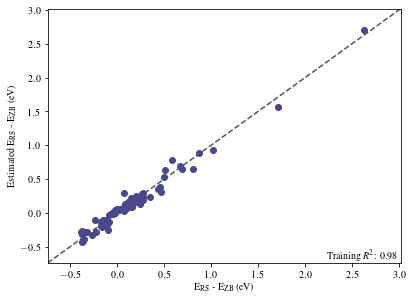

In [20]:
from sissopp.postprocess.plot.parity_plot import plot_model_parity_plot
plot_model_parity_plot("models/train_dim_3_model_0.dat", filename="3d_model.pdf").show()

In [21]:
from sissopp.postprocess.load_models import load_model
model = load_model("models/train_dim_3_model_0.dat")
print(model.latex_str)

model.write_matlab_fxn("matlab_fxn/model.m")

$c_0 + a_0\left(\left(r_{d, B} E_{HOMO, A}\right) \left(\frac{ r_{p, B} }{ r_{d, A} } \right)\right) + a_1\left(\left(IP_{A}^3\right) \left(\left|r_{sigma} - r_{s, B}\right|\right)\right) + a_2\left(\frac{ \left(\frac{ IP_{A} }{ r_{p, A} } \right) }{ \left(r_{p, B} + r_{p, A}\right) } \right)$


# The Python Interface

In [22]:
from sissopp import Inputs
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": 10,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

inputs = Inputs("sisso.json")

In [23]:
from sissopp.py_interface import read_csv
inputs = read_csv(data_file, prop_key="E_RS - E_ZB", max_rung=2, leave_out_frac=0.0)
inputs.allowed_ops = [
    "exp",
    "neg_exp",
    "inv",
    "sq",
    "cb",
    "six_pow",
    "sqrt",
    "cbrt",
    "log",
    "abs",
    "sin",
    "cos",
    "add",
    "sub",
    "abs_diff",
    "mult",
    "div"
]
inputs.n_sis_select = 10
inputs.n_dim = max_dim
inputs.calc_type = "regression"
inputs.n_residual = 10
inputs.n_models_store = 1

In [24]:
import numpy as np
import pandas as pd
from sissopp import Inputs, Unit, FeatureNode
df = pd.read_csv(data_file, index_col=0)
inputs = Inputs()
inputs.allowed_ops = [
    "exp",
    "neg_exp",
    "inv",
    "sq",
    "cb",
    "six_pow",
    "sqrt",
    "cbrt",
    "log",
    "abs",
    "sin",
    "cos",
    "add",
    "sub",
    "abs_diff",
    "mult",
    "div"
]
inputs.n_sis_select = 10
inputs.max_rung = 2
inputs.n_dim = max_dim
inputs.calc_type = "regression"
inputs.n_residual = 10
inputs.n_models_store = 1
inputs.leave_out_inds = []
inputs.task_names = ["all_mats"]
inputs.task_sizes_train = [82]
inputs.task_sizes_test = [0]
inputs.prop_train = df["E_RS - E_ZB (eV)"].to_numpy()
inputs.prop_test = np.array([])
inputs.prop_label = "E_RS - E_ZB"
inputs.prop_unit = Unit("eV")
inputs.sample_ids_train = df.index.tolist()
inputs.sample_ids_test = []
inputs.phi_out_file = "phi.txt"
phi_0 = []
for cc, col in enumerate(df.columns[1:]):
    expr = col.split("(")[0].strip()
    if len(col.split("(")) == 2:
        unit = Unit(col.split("(")[1].split(")")[0].strip())
    else:
        unit = Unit()
    phi_0.append(FeatureNode(cc, expr, df[col].tolist(), [], unit))

inputs.phi_0 = phi_0

In [25]:
from sissopp.py_interface import get_fs_solver

feature_space, sisso = get_fs_solver(inputs, allow_overwrite=True)

Time to generate feat space: 13.1111 s


In [26]:
from sissopp import FeatureSpace, SISSORegressor

feature_space = FeatureSpace(inputs)
sisso = SISSORegressor(inputs, feature_space)

Time to generate feat space: 12.2022 s


In [27]:
sisso.fit()

Projection time: 0.33941 s
Time to get best features on rank : 4.19617e-05 s
Complete final combination/selection from all ranks: 0.000196934 s
Time for SIS: 0.453843 s
Time for l0-norm: 0.001261 s
Projection time: 0.40139 s
Time to get best features on rank : 4.00543e-05 s
Complete final combination/selection from all ranks: 0.000187874 s
Time for SIS: 0.517419 s
Time for l0-norm: 0.00231791 s
Projection time: 0.411278 s
Time to get best features on rank : 4.00543e-05 s
Complete final combination/selection from all ranks: 0.000563145 s
Time for SIS: 0.540404 s
Time for l0-norm: 0.0101249 s


In [28]:
sisso.models[-1][0]

c0 + a0 * ((r_d_B * Z_A) / (|r_p_B - r_s_B|)) + a1 * ((|EA_B - IP_A|) * (|r_sigma - r_s_B|)) + a2 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

In [29]:
from pathlib import Path
import os

from sissopp import Inputs
from sissopp.py_interface import read_csv, get_fs_solver

sisso_regs = []
inputs_base = Inputs("sisso.json")

# This should be 100, but using 10 to speed up the calculation
for ii in range(10):
    work_dir = Path(f"cv_{ii:02d}")
    work_dir.mkdir(exist_ok=True)
    os.chdir(work_dir)
    inputs = read_csv(f"../{data_file}", inputs_base.prop_key, inputs=inputs_base, leave_out_frac= 0.05)
    feature_space, sisso = get_fs_solver(inputs)
    sisso.fit()
    sisso_regs.append(sisso)
    os.chdir("../")


Time to generate feat space: 9.143 s
Projection time: 0.238196 s
Time to get best features on rank : 4.31538e-05 s
Complete final combination/selection from all ranks: 0.000224113 s
Time for SIS: 0.348543 s
Time for l0-norm: 0.001472 s
Projection time: 0.410883 s
Time to get best features on rank : 4.79221e-05 s
Complete final combination/selection from all ranks: 0.000204086 s
Time for SIS: 0.523179 s
Time for l0-norm: 0.00270796 s
Projection time: 0.408031 s
Time to get best features on rank : 4.60148e-05 s
Complete final combination/selection from all ranks: 0.000235081 s
Time for SIS: 0.521648 s
Time for l0-norm: 0.011806 s
Time to generate feat space: 9.13751 s
Projection time: 0.315012 s
Time to get best features on rank : 4.91142e-05 s
Complete final combination/selection from all ranks: 0.000211954 s
Time for SIS: 0.420545 s
Time for l0-norm: 0.00120783 s
Projection time: 0.419007 s
Time to get best features on rank : 6.60419e-05 s
Complete final combination/selection from all 

[0.14147576 0.09497953 0.07363853]
[0.0127949  0.01610162 0.01238118]


/tmp/ipykernel_2244/1053548698.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_validation_rmse(models, "cv_10_error.pdf").show()


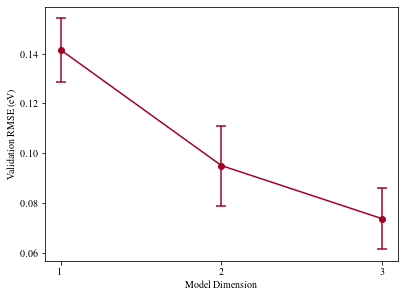

In [30]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
from sissopp.postprocess.plot.cv_error_plot import plot_validation_rmse
import numpy as np
    
models = np.array([[reg.models[dim][0] for reg in sisso_regs] for dim in range(max_dim)])

mean_val_rmse, var_val_rmse = jackknife_cv_conv_est(models)
print(mean_val_rmse)
print(np.sqrt(var_val_rmse))

plot_validation_rmse(models, "cv_10_error.pdf").show()

In [31]:
from sissopp import phi_selected_from_file, FeatureSpace
from sissopp.py_interface import read_csv

inputs = read_csv(data_file, prop_key="E_RS - E_ZB", max_rung=0, leave_out_frac=0.0)
phi_sel = phi_selected_from_file("feature_space/selected_features.txt", inputs.phi_0)
inputs.phi_0 = phi_sel
feature_space = FeatureSpace(inputs)
print(len(feature_space.phi))

Warning requested calculation has a maximum rung of 0


30


Warning requested calculation has a maximum rung of 0


Time to generate feat space: 1.40667e-05 s


In [32]:
from sissopp import phi_selected_from_file, FeatureSpace
from sissopp.py_interface import read_csv

inputs = read_csv(data_file, prop_key="E_RS - E_ZB", max_rung=0, leave_out_frac=0.0)
inputs.n_dim = max_dim
feature_space = FeatureSpace(
    "phi.txt",
    inputs.phi_0,
    inputs.prop_train,
    [82],
    project_type='regression',
    cross_corr_max=1.0,
    n_sis_select=100
)
print(len(feature_space.phi))
sisso = SISSORegressor(inputs, feature_space)
sisso.fit()

Warning requested calculation has a maximum rung of 0

582916
Projection time: 0.553815 s
Time to get best features on rank : 0.000239134 s
Complete final combination/selection from all ranks: 0.00179791 s
Time for SIS: 0.653329 s
Time for l0-norm: 0.000310183 s
Projection time: 0.552253 s
Time to get best features on rank : 0.00022912 s
Complete final combination/selection from all ranks: 0.00156093 s
Time for SIS: 0.658747 s
Time for l0-norm: 0.030508 s
Projection time: 0.546816 s
Time to get best features on rank : 0.000417948 s
Complete final combination/selection from all ranks: 0.0021019 s
Time for SIS: 0.666857 s
Time for l0-norm: 12.7424 s



Warning requested calculation has a maximum rung of 0


In [33]:
from sissopp.postprocess.load_models import load_model
from sissopp.py_interface.import_dataframe import strip_units

model = load_model("models/train_dim_3_model_0.dat")
data_predict = strip_units(data_file)
y_true = data_predict["E_RS - E_ZB"]
data_predict.drop(columns=["E_RS - E_ZB"], inplace=True)

In [34]:
y_pred = model.eval(data_predict.loc["C2", :].values)
print(y_pred)

2.6014256262712037


In [35]:
data_dict = {col: data_predict.loc["C2", col] for col in data_predict.columns}
y_pred = model.eval(data_dict)
print(y_pred)

2.6014256262712037


In [36]:
sample_ids = ["C2", "Si2", "Ge2"]
y_pred = model.eval_many(data_predict.loc[sample_ids, :].values)
print(y_pred)

data_dict = {col: data_predict.loc[sample_ids, col].values for col in data_predict.columns}
y_pred = model.eval_many(data_dict)
print(y_pred)

[2.60142563 0.25088082 0.20091549]
[2.60142563 0.25088082 0.20091549]


In [37]:
model.prediction_to_file(
    "model_predict/predict_from_dict_dim_3_model_0.dat",
    y_true[sample_ids],
    data_dict,
    sample_ids,
    [], # Task ID's if applicable
)

model.prediction_to_file(
    "model_predict/predict_from_arr_dim_3_model_0.dat",
    y_true[sample_ids],
    data_predict.loc[sample_ids, :],
    sample_ids,
    [], # Task ID's if applicable
)

# The `scikit-learn` Interface

In [38]:
import numpy as np
import pandas as pd
from sissopp.sklearn import SISSORegressor
df = pd.read_csv(data_file, index_col=0)
sisso = SISSORegressor(
    prop_label = "E_RS - E_ZB",
    prop_unit = "eV",
    allowed_ops = "all",
    n_dim = max_dim,
    max_rung = 2,
    n_sis_select = 10,
    n_residual = 10,
)

In [39]:
import numpy as np
import pandas as pd
from sissopp.sklearn import SISSORegressor
from sissopp.py_interface import read_csv

df = pd.read_csv(data_file, index_col=0)
inputs = read_csv(df, prop_key="E_RS - E_ZB", max_rung=2)
inputs.n_sis_select = 10
inputs.n_dim = max_dim
inputs.n_residual = 10
inputs.allowed_ops = ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
sisso = SISSORegressor.from_inputs(inputs)

In [40]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0].values
sisso.fit(X, y)

Time to generate feat space: 9.87016 s
Projection time: 0.352018 s
Time to get best features on rank : 4.19617e-05 s
Complete final combination/selection from all ranks: 0.00017786 s
Time for SIS: 0.467727 s
Time for l0-norm: 0.00134516 s
Projection time: 0.404956 s
Time to get best features on rank : 3.88622e-05 s
Complete final combination/selection from all ranks: 0.0001719 s
Time for SIS: 0.524718 s
Time for l0-norm: 0.00215816 s
Projection time: 0.417669 s
Time to get best features on rank : 3.69549e-05 s
Complete final combination/selection from all ranks: 0.000173092 s
Time for SIS: 0.534517 s
Time for l0-norm: 0.0139511 s


In [41]:
from sissopp.sklearn import regression_metric
from sklearn.metrics import mean_absolute_error

y_pred = sisso.predict(X)
rmse = regression_metric(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(rmse, mae)

0.07255222356607217 0.055532954162035034


In [42]:
%%bash
ls SISSO_*

feature_space
models


In [43]:
sisso.workdir = "sklearn_sisso_test"
sisso.fit(X, y)

Time to generate feat space: 9.39181 s
Projection time: 0.343014 s
Time to get best features on rank : 3.69549e-05 s
Complete final combination/selection from all ranks: 0.00016284 s
Time for SIS: 0.441681 s
Time for l0-norm: 0.00124693 s
Projection time: 0.389647 s
Time to get best features on rank : 4.00543e-05 s
Complete final combination/selection from all ranks: 0.000191927 s
Time for SIS: 0.489055 s
Time for l0-norm: 0.002002 s
Projection time: 0.394376 s
Time to get best features on rank : 3.69549e-05 s
Complete final combination/selection from all ranks: 0.000211 s
Time for SIS: 0.495678 s
Time for l0-norm: 0.00967503 s


In [44]:
%%bash
ls sklearn_sisso_test/

feature_space
models


In [45]:
sisso.workdir = "sklearn_sisso_test_cleaned"
sisso.clean_workdir = True
sisso.fit(X, y)

Time to generate feat space: 8.35961 s
Projection time: 0.374764 s
Time to get best features on rank : 4.22001e-05 s
Complete final combination/selection from all ranks: 0.000203848 s
Time for SIS: 0.504379 s
Time for l0-norm: 0.00134087 s
Projection time: 0.44912 s
Time to get best features on rank : 4.00543e-05 s
Complete final combination/selection from all ranks: 0.000199795 s
Time for SIS: 0.557945 s
Time for l0-norm: 0.00282788 s
Projection time: 0.445476 s
Time to get best features on rank : 3.98159e-05 s
Complete final combination/selection from all ranks: 0.00019908 s
Time for SIS: 0.593544 s
Time for l0-norm: 0.0104001 s


In [46]:
%%bash
ls

3d_model.pdf
cv_00
cv_01
cv_02
cv_03
cv_04
cv_05
cv_06
cv_07
cv_08
cv_09
cv_10_error.pdf
error_cv_dist.png
feature_space
matlab_fxn
model_predict
models
ns_10_nr_1
ns_10_nr_10
ns_10_nr_5
phi.txt
SISSO_2022-05-23_16:41:05
sisso.json
sissopp_tut_data.csv
sissopp_tutorial.ipynb
sklearn_sisso_test


In [47]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer
from sissopp.sklearn import get_default_model_metric

kf = KFold(n_splits=10, random_state=13, shuffle=True)

metric = get_default_model_metric(sisso)
scorer = make_scorer(metric, greater_is_better=False)

sisso.workdir = None
sisso.clean_workdir = False

cv_results = cross_validate(sisso, X, y, cv=kf, scoring=scorer)
print(cv_results["test_score"].mean())

Time to generate feat space: 8.53254 s
Projection time: 0.354071 s
Time to get best features on rank : 4.1008e-05 s
Complete final combination/selection from all ranks: 0.000226974 s
Time for SIS: 0.461021 s
Time for l0-norm: 0.001091 s
Projection time: 0.382054 s
Time to get best features on rank : 3.91006e-05 s
Complete final combination/selection from all ranks: 0.000193119 s
Time for SIS: 0.49464 s
Time for l0-norm: 0.00191188 s
Projection time: 0.403307 s
Time to get best features on rank : 4.19617e-05 s
Complete final combination/selection from all ranks: 0.000201941 s
Time for SIS: 0.515844 s
Time for l0-norm: 0.0104709 s
Time to generate feat space: 10.8236 s
Projection time: 0.353973 s
Time to get best features on rank : 7.39098e-05 s
Complete final combination/selection from all ranks: 0.000259876 s
Time for SIS: 0.494485 s
Time for l0-norm: 0.00204396 s
Projection time: 0.428027 s
Time to get best features on rank : 4.91142e-05 s
Complete final combination/selection from all

In [48]:
sisso.workdir = "cv_test"

cv_results = cross_validate(sisso, X, y, cv=kf, scoring=scorer)
print(cv_results["test_score"].mean())

Time to generate feat space: 8.37248 s
Projection time: 0.337773 s
Time to get best features on rank : 4.29153e-05 s
Complete final combination/selection from all ranks: 0.00019908 s
Time for SIS: 0.42777 s
Time for l0-norm: 0.00146103 s
Projection time: 0.383925 s
Time to get best features on rank : 3.60012e-05 s
Complete final combination/selection from all ranks: 0.000170946 s
Time for SIS: 0.49052 s
Time for l0-norm: 0.00211501 s
Projection time: 0.387338 s
Time to get best features on rank : 4.31538e-05 s
Complete final combination/selection from all ranks: 0.0001719 s
Time for SIS: 0.498725 s
Time for l0-norm: 0.0136559 s
Time to generate feat space: 10.9991 s
Projection time: 0.337449 s
Time to get best features on rank : 4.81606e-05 s
Complete final combination/selection from all ranks: 0.000233889 s
Time for SIS: 0.460669 s
Time for l0-norm: 0.00146699 s
Projection time: 0.393095 s
Time to get best features on rank : 5.29289e-05 s
Complete final combination/selection from all 

In [49]:
%%bash
ls cv_test/

feature_space
models


In [50]:
from sissopp.sklearn import cross_validate_from_splitter

test_scores = cross_validate_from_splitter(X, y, sisso, kf, scoring=scorer)
print(np.mean(test_scores))

Time to generate feat space: 8.34877 s
Projection time: 0.33999 s
Time to get best features on rank : 3.79086e-05 s
Complete final combination/selection from all ranks: 0.000197887 s
Time for SIS: 0.433967 s
Time for l0-norm: 0.00170088 s
Projection time: 0.398016 s
Time to get best features on rank : 3.79086e-05 s
Complete final combination/selection from all ranks: 0.000201225 s
Time for SIS: 0.497853 s
Time for l0-norm: 0.002985 s
Projection time: 0.401924 s
Time to get best features on rank : 3.79086e-05 s
Complete final combination/selection from all ranks: 0.000200987 s
Time for SIS: 0.502415 s
Time for l0-norm: 0.0105381 s
Time to generate feat space: 8.42315 s
Projection time: 0.270161 s
Time to get best features on rank : 4.60148e-05 s
Complete final combination/selection from all ranks: 0.000208139 s
Time for SIS: 0.388181 s
Time for l0-norm: 0.00135589 s
Projection time: 0.362529 s
Time to get best features on rank : 6.10352e-05 s
Complete final combination/selection from al

In [51]:
%%bash
ls cv_test/

cv_0
cv_1
cv_2
cv_3
cv_4
cv_5
cv_6
cv_7
cv_8
cv_9
feature_space
models


In [52]:
%%bash
ls cv_test/cv_0/models/

test_dim_1_model_0.dat
test_dim_2_model_0.dat
test_dim_3_model_0.dat
train_dim_1_model_0.dat
train_dim_2_model_0.dat
train_dim_3_model_0.dat


# Performing Classification with SISSO++

In [53]:
data_csv_lines = """# Material,Class,Z_A (nuc_charge) ,Z_B (nuc_charge) ,period_A,period_B,IP_A (eV_IP) ,IP_B (eV_IP) ,EA_A (eV_IP),EA_B (eV_IP) ,E_HOMO_A (eV) ,E_HOMO_B (eV) ,E_LUMO_A (eV),E_LUMO_B (eV) ,r_s_A ,r_s_B ,r_p_A ,r_p_B ,r_d_A ,r_d_B,r_sigma ,r_pi
AgBr,0,47,35,5,4,-8.0580997467,-12.649600029,-1.66659998894,-3.73930001259,-4.71000003815,-8.00100040436,-0.479000002146,0.708000004292,1.32000005245,0.75,1.87999999523,0.879999995232,2.97000002861,1.87000000477,1.570000052448,0.689999938012
AgCl,0,47,17,5,3,-8.0580997467,-13.9018001556,-1.66659998894,-3.97079992294,-4.71000003815,-8.69999980927,-0.479000002146,0.574000000954,1.32000005245,0.680000007153,1.87999999523,0.759999990463,2.97000002861,1.66999995708,1.760000050064,0.63999992609
AgF,0,47,9,5,2,-8.0580997467,-19.4043006897,-1.66659998894,-4.27349996567,-4.71000003815,-11.2939996719,-0.479000002146,1.25100004673,1.32000005245,0.409999996424,1.87999999523,0.370000004768,2.97000002861,1.42999994755,2.420000046488,0.599999934436
AgI,1,47,53,5,5,-8.0580997467,-11.2571001053,-1.66659998894,-3.5134999752,-4.71000003815,-7.23600006104,-0.479000002146,0.212999999523,1.32000005245,0.899999976158,1.87999999523,1.07000005245,2.97000002861,1.72000002861,1.230000019072,0.730000019072
AlAs,1,13,33,3,4,-5.78049993515,-9.26189994812,-0.3125,-1.83920001984,-2.78399991989,-5.34100008011,0.694999992847,0.0640000030398,1.09000003338,0.850000023842,1.38999998569,1.03999996185,1.94000005722,2.01999998093,0.590000033378,0.489999890318
AlN,1,13,7,3,2,-5.78049993515,-13.5852003098,-0.3125,-1.86749994755,-2.78399991989,-7.2389998436,0.694999992847,3.0569999218,1.09000003338,0.540000021458,1.38999998569,0.509999990463,1.94000005722,1.53999996185,1.430000007149,0.329999983305
AlP,1,13,15,3,3,-5.78049993515,-9.75059986115,-0.3125,-1.91999995708,-2.78399991989,-5.59600019455,0.694999992847,0.182999998331,1.09000003338,0.829999983311,1.38999998569,0.97000002861,1.94000005722,1.76999998093,0.680000007149,0.439999997609
AlSb,1,13,51,3,5,-5.78049993515,-8.46829986572,-0.3125,-1.84669995308,-2.78399991989,-4.99100017548,0.694999992847,0.104999996722,1.09000003338,1,1.38999998569,1.23000001907,1.94000005722,2.05999994278,0.25,0.52999997138
AsGa,1,31,33,4,4,-5.81820011139,-9.26189994812,-0.108099997044,-1.83920001984,-2.73200011253,-5.34100008011,0.129999995232,0.0640000030398,0.990000009537,0.850000023842,1.33000004292,1.03999996185,2.16000008583,2.01999998093,0.430000066765,0.529999971391
AsB,1,5,33,2,4,-8.18999958038,-9.26189994812,-0.107400000095,-1.83920001984,-3.71499991417,-5.34100008011,2.24799990654,0.0640000030398,0.810000002384,0.850000023842,0.829999983311,1.03999996185,1.95000004768,2.01999998093,0.249999999997,0.209999918935
BN,1,5,7,2,2,-8.18999958038,-13.5852003098,-0.107400000095,-1.86749994755,-3.71499991417,-7.2389998436,2.24799990654,3.0569999218,0.810000002384,0.540000021458,0.829999983311,0.509999990463,1.95000004768,1.53999996185,0.589999973774,0.050000011922
BP,1,5,15,2,3,-8.18999958038,-9.75059986115,-0.107400000095,-1.91999995708,-3.71499991417,-5.59600019455,2.24799990654,0.182999998331,0.810000002384,0.829999983311,0.829999983311,0.97000002861,1.95000004768,1.76999998093,0.160000026226,0.160000026226
BSb,1,5,51,2,5,-8.18999958038,-8.46829986572,-0.107400000095,-1.84669995308,-3.71499991417,-4.99100017548,2.24799990654,0.104999996722,0.810000002384,1,0.829999983311,1.23000001907,1.95000004768,2.05999994278,0.590000033375,0.249999999997
BaO,0,56,8,6,2,-5.51569986343,-16.4332008362,0.277999997139,-3.00589990616,-3.34599995613,-9.19699954987,-2.1289999485,2.54099988937,2.15000009537,0.460000008345,2.63000011444,0.430000007153,1.35000002384,2.22000002861,3.890000194312,0.510000020262
BaS,0,56,16,6,3,-5.51569986343,-11.7951002121,0.277999997139,-2.84489989281,-3.34599995613,-7.10599994659,-2.1289999485,0.64200001955,2.15000009537,0.740000009537,2.63000011444,0.850000023842,1.35000002384,2.36999988556,3.190000176431,0.590000033375
BaSe,0,56,34,6,4,-5.51569986343,-10.9460000992,0.277999997139,-2.75099992752,-3.34599995613,-6.65399980545,-2.1289999485,1.31599998474,2.15000009537,0.800000011921,2.63000011444,0.949999988079,1.35000002384,2.18000006676,3.03000020981,0.629999995228
BaTe,0,56,52,6,5,-5.51569986343,-9.86670017242,0.277999997139,-2.66599988937,-3.34599995613,-6.10900020599,-2.1289999485,0.0989999994636,2.15000009537,0.939999997616,2.63000011444,1.13999998569,1.35000002384,1.83000004292,2.700000226504,0.680000007144
BeO,1,4,8,2,2,-9.459400177,-16.4332008362,0.630500018597,-3.00589990616,-5.59999990463,-9.19699954987,-2.09800004959,2.54099988937,1.08000004292,0.460000008345,1.21000003815,0.430000007153,2.88000011444,2.22000002861,1.400000065572,0.159999996422
BeS,1,4,16,2,3,-9.459400177,-11.7951002121,0.630500018597,-2.84489989281,-5.59999990463,-7.10599994659,-2.09800004959,0.64200001955,1.08000004292,0.740000009537,1.21000003815,0.850000023842,2.88000011444,2.36999988556,0.700000047691,0.240000009535
BeSe,1,4,34,2,4,-9.459400177,-10.9460000992,0.630500018597,-2.75099992752,-5.59999990463,-6.65399980545,-2.09800004959,1.31599998474,1.08000004292,0.800000011921,1.21000003815,0.949999988079,2.88000011444,2.18000006676,0.54000008107,0.279999971388
BeTe,1,4,52,2,5,-9.459400177,-9.86670017242,0.630500018597,-2.66599988937,-5.59999990463,-6.10900020599,-2.09800004959,0.0989999994636,1.08000004292,0.939999997616,1.21000003815,1.13999998569,2.88000011444,1.83000004292,0.210000097764,0.329999983304
C2,1,6,6,2,2,-10.8516998291,-10.8516998291,-0.87239998579,-0.87239998579,-5.41599988937,-5.41599988937,1.99199998379,1.99199998379,0.639999985695,0.639999985695,0.629999995232,0.629999995232,1.62999999523,1.62999999523,0,0.019999980926
CaO,0,20,8,4,2,-6.4279999733,-16.4332008362,0.303900003433,-3.00589990616,-3.86400008202,-9.19699954987,-2.132999897,2.54099988937,1.75999999046,0.460000008345,2.31999993324,0.430000007153,0.680000007153,2.22000002861,3.189999908202,0.589999943972
CaS,0,20,16,4,3,-6.4279999733,-11.7951002121,0.303900003433,-2.84489989281,-3.86400008202,-7.10599994659,-2.132999897,0.64200001955,1.75999999046,0.740000009537,2.31999993324,0.850000023842,0.680000007153,2.36999988556,2.489999890321,0.669999957085
CaSe,0,20,34,4,4,-6.4279999733,-10.9460000992,0.303900003433,-2.75099992752,-3.86400008202,-6.65399980545,-2.132999897,1.31599998474,1.75999999046,0.800000011921,2.31999993324,0.949999988079,0.680000007153,2.18000006676,2.3299999237,0.709999918938
CaTe,0,20,52,4,5,-6.4279999733,-9.86670017242,0.303900003433,-2.66599988937,-3.86400008202,-6.10900020599,-2.132999897,0.0989999994636,1.75999999046,0.939999997616,2.31999993324,1.13999998569,0.680000007153,1.83000004292,1.999999940394,0.759999930854
CdO,0,48,8,5,2,-9.5813999176,-16.4332008362,0.838699996471,-3.00589990616,-5.95200014114,-9.19699954987,-1.30900001526,2.54099988937,1.23000001907,0.460000008345,1.74000000954,0.430000007153,2.59999990463,2.22000002861,2.080000013112,0.539999991662
CdS,1,48,16,5,3,-9.5813999176,-11.7951002121,0.838699996471,-2.84489989281,-5.95200014114,-7.10599994659,-1.30900001526,0.64200001955,1.23000001907,0.740000009537,1.74000000954,0.850000023842,2.59999990463,2.36999988556,1.379999995231,0.620000004775
CdSe,1,48,34,5,4,-9.5813999176,-10.9460000992,0.838699996471,-2.75099992752,-5.95200014114,-6.65399980545,-1.30900001526,1.31599998474,1.23000001907,0.800000011921,1.74000000954,0.949999988079,2.59999990463,2.18000006676,1.22000002861,0.659999966628
CdTe,1,48,52,5,5,-9.5813999176,-9.86670017242,0.838699996471,-2.66599988937,-5.95200014114,-6.10900020599,-1.30900001526,0.0989999994636,1.23000001907,0.939999997616,1.74000000954,1.13999998569,2.59999990463,1.83000004292,0.890000045304,0.709999978544
BrCs,0,55,35,6,4,-4.00619983673,-12.649600029,-0.569599986076,-3.73930001259,-2.22000002861,-8.00100040436,-0.547999978065,0.708000004292,2.46000003815,0.75,3.16000008583,0.879999995232,1.97000002861,1.87000000477,3.990000128748,0.830000042912
ClCs,0,55,17,6,3,-4.00619983673,-13.9018001556,-0.569599986076,-3.97079992294,-2.22000002861,-8.69999980927,-0.547999978065,0.574000000954,2.46000003815,0.680000007153,3.16000008583,0.759999990463,1.97000002861,1.66999995708,4.180000126364,0.78000003099
CsF,0,55,9,6,2,-4.00619983673,-19.4043006897,-0.569599986076,-4.27349996567,-2.22000002861,-11.2939996719,-0.547999978065,1.25100004673,2.46000003815,0.409999996424,3.16000008583,0.370000004768,1.97000002861,1.42999994755,4.840000122788,0.740000039336
CsI,0,55,53,6,5,-4.00619983673,-11.2571001053,-0.569599986076,-3.5134999752,-2.22000002861,-7.23600006104,-0.547999978065,0.212999999523,2.46000003815,0.899999976158,3.16000008583,1.07000005245,1.97000002861,1.72000002861,3.650000095372,0.870000123972
BrCu,1,29,35,4,4,-8.38879966736,-12.649600029,-1.6384999752,-3.73930001259,-4.85599994659,-8.00100040436,-0.64099997282,0.708000004292,1.20000004768,0.75,1.67999994755,0.879999995232,2.57999992371,1.87000000477,1.249999999998,0.609999895102
ClCu,1,29,17,4,3,-8.38879966736,-13.9018001556,-1.6384999752,-3.97079992294,-4.85599994659,-8.69999980927,-0.64099997282,0.574000000954,1.20000004768,0.680000007153,1.67999994755,0.759999990463,2.57999992371,1.66999995708,1.439999997614,0.55999988318
CuF,0,29,9,4,2,-8.38879966736,-19.4043006897,-1.6384999752,-4.27349996567,-4.85599994659,-11.2939996719,-0.64099997282,1.25100004673,1.20000004768,0.409999996424,1.67999994755,0.370000004768,2.57999992371,1.42999994755,2.099999994038,0.519999891526
CuI,1,29,53,4,5,-8.38879966736,-11.2571001053,-1.6384999752,-3.5134999752,-4.85599994659,-7.23600006104,-0.64099997282,0.212999999523,1.20000004768,0.899999976158,1.67999994755,1.07000005245,2.57999992371,1.72000002861,0.909999966622,0.649999976162
GaN,1,31,7,4,2,-5.81820011139,-13.5852003098,-0.108099997044,-1.86749994755,-2.73200011253,-7.2389998436,0.129999995232,3.0569999218,0.990000009537,0.540000021458,1.33000004292,0.509999990463,2.16000008583,1.53999996185,1.270000040536,0.370000064378
GaP,1,31,15,4,3,-5.81820011139,-9.75059986115,-0.108099997044,-1.91999995708,-2.73200011253,-5.59600019455,0.129999995232,0.182999998331,0.990000009537,0.829999983311,1.33000004292,0.97000002861,2.16000008583,1.76999998093,0.520000040536,0.480000078682
GaSb,1,31,51,4,5,-5.81820011139,-8.46829986572,-0.108099997044,-1.84669995308,-2.73200011253,-4.99100017548,0.129999995232,0.104999996722,0.990000009537,1,1.33000004292,1.23000001907,2.16000008583,2.05999994278,0.090000033387,0.570000052453
Ge2,1,32,32,4,4,-7.56699991226,-7.56699991226,-0.949000000954,-0.949000000954,-4.04600000381,-4.04600000381,2.17499995232,2.17499995232,0.920000016689,0.920000016689,1.15999996662,1.15999996662,2.36999988556,2.36999988556,0,0.479999899862
CGe,1,32,6,4,2,-7.56699991226,-10.8516998291,-0.949000000954,-0.87239998579,-4.04600000381,-5.41599988937,2.17499995232,1.99199998379,0.920000016689,0.639999985695,1.15999996662,0.629999995232,2.36999988556,1.62999999523,0.810000002382,0.249999940394
GeSi,1,32,14,4,3,-7.56699991226,-7.75769996643,-0.949000000954,-0.992999970913,-4.04600000381,-4.16300010681,2.17499995232,0.439999997616,0.920000016689,0.939999997616,1.15999996662,1.12999999523,2.36999988556,1.88999998569,0.009999990463,0.429999947545
AsIn,1,49,33,5,4,-5.53739976883,-9.26189994812,-0.256300002337,-1.83920001984,-2.6970000267,-5.34100008011,0.368000000715,0.0640000030398,1.12999999523,0.850000023842,1.5,1.03999996185,3.1099998951,2.01999998093,0.740000009538,0.559999942778
InN,1,49,7,5,2,-5.53739976883,-13.5852003098,-0.256300002337,-1.86749994755,-2.6970000267,-7.2389998436,0.368000000715,3.0569999218,1.12999999523,0.540000021458,1.5,0.509999990463,3.1099998951,1.53999996185,1.579999983309,0.400000035765
InP,1,49,15,5,3,-5.53739976883,-9.75059986115,-0.256300002337,-1.91999995708,-2.6970000267,-5.59600019455,0.368000000715,0.182999998331,1.12999999523,0.829999983311,1.5,0.97000002861,3.1099998951,1.76999998093,0.829999983309,0.510000050069
InSb,1,49,51,5,5,-5.53739976883,-8.46829986572,-0.256300002337,-1.84669995308,-2.6970000267,-4.99100017548,0.368000000715,0.104999996722,1.12999999523,1,1.5,1.23000001907,3.1099998951,2.05999994278,0.39999997616,0.60000002384
BrK,0,19,35,4,4,-4.43319988251,-12.649600029,-0.621299982071,-3.73930001259,-2.42600011826,-8.00100040436,-0.697000026703,0.708000004292,2.13000011444,0.75,2.44000005722,0.879999995232,1.78999996185,1.87000000477,2.940000176428,0.439999938012
ClK,0,19,17,4,3,-4.43319988251,-13.9018001556,-0.621299982071,-3.97079992294,-2.42600011826,-8.69999980927,-0.697000026703,0.574000000954,2.13000011444,0.680000007153,2.44000005722,0.759999990463,1.78999996185,1.66999995708,3.130000174044,0.38999992609
FK,0,19,9,4,2,-4.43319988251,-19.4043006897,-0.621299982071,-4.27349996567,-2.42600011826,-11.2939996719,-0.697000026703,1.25100004673,2.13000011444,0.409999996424,2.44000005722,0.370000004768,1.78999996185,1.42999994755,3.790000170468,0.349999934436
IK,0,19,53,4,5,-4.43319988251,-11.2571001053,-0.621299982071,-3.5134999752,-2.42600011826,-7.23600006104,-0.697000026703,0.212999999523,2.13000011444,0.899999976158,2.44000005722,1.07000005245,1.78999996185,1.72000002861,2.600000143052,0.480000019072
BrLi,0,3,35,2,4,-5.32910013199,-12.649600029,-0.698099970818,-3.73930001259,-2.87400007248,-8.00100040436,-0.977999985218,0.708000004292,1.64999997616,0.75,2,0.879999995232,6.92999982834,1.87000000477,2.019999980928,0.480000019072
ClLi,0,3,17,2,3,-5.32910013199,-13.9018001556,-0.698099970818,-3.97079992294,-2.87400007248,-8.69999980927,-0.977999985218,0.574000000954,1.64999997616,0.680000007153,2,0.759999990463,6.92999982834,1.66999995708,2.209999978544,0.43000000715
FLi,0,3,9,2,2,-5.32910013199,-19.4043006897,-0.698099970818,-4.27349996567,-2.87400007248,-11.2939996719,-0.977999985218,1.25100004673,1.64999997616,0.409999996424,2,0.370000004768,6.92999982834,1.42999994755,2.869999974968,0.390000015496
ILi,0,3,53,2,5,-5.32910013199,-11.2571001053,-0.698099970818,-3.5134999752,-2.87400007248,-7.23600006104,-0.977999985218,0.212999999523,1.64999997616,0.899999976158,2,1.07000005245,6.92999982834,1.72000002861,1.679999947552,0.520000100132
MgO,0,12,8,3,2,-8.03709983826,-16.4332008362,0.692499995232,-3.00589990616,-4.78200006485,-9.19699954987,-1.35800004005,2.54099988937,1.33000004292,0.460000008345,1.89999997616,0.430000007153,3.17000007629,2.22000002861,2.340000003582,0.599999934432
MgS,0,12,16,3,3,-8.03709983826,-11.7951002121,0.692499995232,-2.84489989281,-4.78200006485,-7.10599994659,-1.35800004005,0.64200001955,1.33000004292,0.740000009537,1.89999997616,0.850000023842,3.17000007629,2.36999988556,1.639999985701,0.679999947545
MgSe,0,12,34,3,4,-8.03709983826,-10.9460000992,0.692499995232,-2.75099992752,-4.78200006485,-6.65399980545,-1.35800004005,1.31599998474,1.33000004292,0.800000011921,1.89999997616,0.949999988079,3.17000007629,2.18000006676,1.48000001908,0.719999909398
MgTe,0,12,52,3,5,-8.03709983826,-9.86670017242,0.692499995232,-2.66599988937,-4.78200006485,-6.10900020599,-1.35800004005,0.0989999994636,1.33000004292,0.939999997616,1.89999997616,1.13999998569,3.17000007629,1.83000004292,1.150000035774,0.769999921314
BrNa,0,11,35,3,4,-5.22310018539,-12.649600029,-0.715699970722,-3.73930001259,-2.81900000572,-8.00100040436,-0.717999994755,0.708000004292,1.71000003815,0.75,2.59999990463,0.879999995232,6.57000017166,1.87000000477,2.679999947548,1.019999861712
ClNa,0,11,17,3,3,-5.22310018539,-13.9018001556,-0.715699970722,-3.97079992294,-2.81900000572,-8.69999980927,-0.717999994755,0.574000000954,1.71000003815,0.680000007153,2.59999990463,0.759999990463,6.57000017166,1.66999995708,2.869999945164,0.96999984979
FNa,0,11,9,3,2,-5.22310018539,-19.4043006897,-0.715699970722,-4.27349996567,-2.81900000572,-11.2939996719,-0.717999994755,1.25100004673,1.71000003815,0.409999996424,2.59999990463,0.370000004768,6.57000017166,1.42999994755,3.529999941588,0.929999858136
INa,0,11,53,3,5,-5.22310018539,-11.2571001053,-0.715699970722,-3.5134999752,-2.81900000572,-7.23600006104,-0.717999994755,0.212999999523,1.71000003815,0.899999976158,2.59999990463,1.07000005245,6.57000017166,1.72000002861,2.339999914172,1.059999942772
BrRb,0,37,35,5,4,-4.28889989853,-12.649600029,-0.590399980545,-3.73930001259,-2.3599998951,-8.00100040436,-0.704999983311,0.708000004292,2.24000000954,0.75,3.20000004768,0.879999995232,1.96000003815,1.87000000477,3.810000061988,1.090000033372
ClRb,0,37,17,5,3,-4.28889989853,-13.9018001556,-0.590399980545,-3.97079992294,-2.3599998951,-8.69999980927,-0.704999983311,0.574000000954,2.24000000954,0.680000007153,3.20000004768,0.759999990463,1.96000003815,1.66999995708,4.000000059604,1.04000002145
FRb,0,37,9,5,2,-4.28889989853,-19.4043006897,-0.590399980545,-4.27349996567,-2.3599998951,-11.2939996719,-0.704999983311,1.25100004673,2.24000000954,0.409999996424,3.20000004768,0.370000004768,1.96000003815,1.42999994755,4.660000056028,1.000000029796
IRb,0,37,53,5,5,-4.28889989853,-11.2571001053,-0.590399980545,-3.5134999752,-2.3599998951,-7.23600006104,-0.704999983311,0.212999999523,2.24000000954,0.899999976158,3.20000004768,1.07000005245,1.96000003815,1.72000002861,3.470000028612,1.130000114432
Si2,1,14,14,3,3,-7.75769996643,-7.75769996643,-0.992999970913,-0.992999970913,-4.16300010681,-4.16300010681,0.439999997616,0.439999997616,0.939999997616,0.939999997616,1.12999999523,1.12999999523,1.88999998569,1.88999998569,0,0.379999995228
CSi,1,14,6,3,2,-7.75769996643,-10.8516998291,-0.992999970913,-0.87239998579,-4.16300010681,-5.41599988937,0.439999997616,1.99199998379,0.939999997616,0.639999985695,1.12999999523,0.629999995232,1.88999998569,1.62999999523,0.800000011919,0.199999988077
Sn2,1,50,50,5,5,-7.04279994965,-7.04279994965,-1.03919994831,-1.03919994831,-3.86599993706,-3.86599993706,0.00800000037998,0.00800000037998,1.05999994278,1.05999994278,1.34000003338,1.34000003338,2.02999997139,2.02999997139,0,0.5600001812
CSn,1,50,6,5,2,-7.04279994965,-10.8516998291,-1.03919994831,-0.87239998579,-3.86599993706,-5.41599988937,0.00800000037998,1.99199998379,1.05999994278,0.639999985695,1.34000003338,0.629999995232,2.02999997139,1.62999999523,1.129999995233,0.290000081063
GeSn,1,50,32,5,4,-7.04279994965,-7.56699991226,-1.03919994831,-0.949000000954,-3.86599993706,-4.04600000381,0.00800000037998,2.17499995232,1.05999994278,0.920000016689,1.34000003338,1.15999996662,2.02999997139,2.36999988556,0.319999992851,0.520000040531
SiSn,1,50,14,5,3,-7.04279994965,-7.75769996643,-1.03919994831,-0.992999970913,-3.86599993706,-4.16300010681,0.00800000037998,0.439999997616,1.05999994278,0.939999997616,1.34000003338,1.12999999523,2.02999997139,1.88999998569,0.329999983314,0.470000088214
OSr,0,38,8,5,2,-6.03159999847,-16.4332008362,0.343100011349,-3.00589990616,-3.64100003242,-9.19699954987,-1.3789999485,2.54099988937,1.90999996662,0.460000008345,2.54999995232,0.430000007153,1.20000004768,2.22000002861,3.569999903442,0.669999986892
SSr,0,38,16,5,3,-6.03159999847,-11.7951002121,0.343100011349,-2.84489989281,-3.64100003242,-7.10599994659,-1.3789999485,0.64200001955,1.90999996662,0.740000009537,2.54999995232,0.850000023842,1.20000004768,2.36999988556,2.869999885561,0.750000000005
SeSr,0,38,34,5,4,-6.03159999847,-10.9460000992,0.343100011349,-2.75099992752,-3.64100003242,-6.65399980545,-1.3789999485,1.31599998474,1.90999996662,0.800000011921,2.54999995232,0.949999988079,1.20000004768,2.18000006676,2.70999991894,0.789999961858
SrTe,0,38,52,5,5,-6.03159999847,-9.86670017242,0.343100011349,-2.66599988937,-3.64100003242,-6.10900020599,-1.3789999485,0.0989999994636,1.90999996662,0.939999997616,2.54999995232,1.13999998569,1.20000004768,1.83000004292,2.379999935634,0.839999973773999
OZn,1,30,8,4,2,-10.1354999542,-16.4332008362,1.08070003986,-3.00589990616,-6.21700000763,-9.19699954987,-1.19400000572,2.54099988937,1.10000002384,0.460000008345,1.54999995232,0.430000007153,2.25,2.22000002861,1.759999960662,0.479999929672
SZn,1,30,16,4,3,-10.1354999542,-11.7951002121,1.08070003986,-2.84489989281,-6.21700000763,-7.10599994659,-1.19400000572,0.64200001955,1.10000002384,0.740000009537,1.54999995232,0.850000023842,2.25,2.36999988556,1.059999942781,0.559999942785
SeZn,1,30,34,4,4,-10.1354999542,-10.9460000992,1.08070003986,-2.75099992752,-6.21700000763,-6.65399980545,-1.19400000572,1.31599998474,1.10000002384,0.800000011921,1.54999995232,0.949999988079,2.25,2.18000006676,0.89999997616,0.599999904638
TeZn,1,30,52,4,5,-10.1354999542,-9.86670017242,1.08070003986,-2.66599988937,-6.21700000763,-6.10900020599,-1.19400000572,0.0989999994636,1.10000002384,0.939999997616,1.54999995232,1.13999998569,2.25,1.83000004292,0.569999992854,0.649999916554"""
data_file = "sissopp_tut_class_data.csv"
open(data_file, "w").write(data_csv_lines)
print(f"Data file now written to {data_file}")

os.environ["SISSOPP_TUT_DAT_FILE"] = data_file

Data file now written to sissopp_tut_class_data.csv


In [54]:
from sissopp import Inputs
sisso_json = {
    "data_file": data_file,
    "property_key": "Class",
    "desc_dim": 2,
    "n_sis_select": 20,
    "max_rung": 1,
    "calc_type": "classification",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 1,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

inputs = Inputs("sisso.json")

In [55]:
%%bash
sisso++

time input_parsing: 0.00167298 s
Time to generate feat space: 0.0107191 s
Projection time: 0.00137401 s
Time to get best features on rank : 0.000916958 s
Complete final combination/selection from all ranks: 0.00119305 s
Time for SIS: 0.00378895 s
Time for l0-norm: 0.057941 s
Projection time: 0.00104904 s
Time to get best features on rank : 0.00563216 s
Complete final combination/selection from all ranks: 0.000272989 s
Time for SIS: 0.00769091 s
Time for l0-norm: 1.41497 s
Percent of training data in the convex overlap region: 2.43902%
[(r_sigma + r_p_B)]

Percent of training data in the convex overlap region: 0%
[(E_HOMO_A * Z_A), (|r_pi - r_p_A|)]



In [56]:
from sissopp.postprocess.classification import update_model_svm
model_1 = update_model_svm("models/train_dim_2_model_0.dat", 1.0, 100000, filename="models/train_dim_2_model_0_c_1.dat")
model_10 = update_model_svm("models/train_dim_2_model_0.dat", 10.0, 100000, filename="models/train_dim_2_model_0_c_10.dat")
model_100 = update_model_svm("models/train_dim_2_model_0.dat", 100.0, 100000, filename="models/train_dim_2_model_0_c_100.dat")
model_1000 = update_model_svm("models/train_dim_2_model_0.dat", 1000.0, 100000, filename="models/train_dim_2_model_0_c_1000.dat")

The updated coefficient for the decision boundaries:
[array([[-6.51696952e-04, -2.01236164e+00,  2.44000807e+00]])]
The updated coefficient for the decision boundaries:
[array([[-1.09405804e-03, -4.67892679e+00,  5.30385422e+00]])]
The updated coefficient for the decision boundaries:
[array([[-2.52746586e-03, -1.13296327e+01,  1.25710001e+01]])]
The updated coefficient for the decision boundaries:
[array([[-8.83315081e-03, -2.74743334e+01,  2.99376557e+01]])]


/tmp/ipykernel_2244/3162726280.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_classification("models/train_dim_2_model_0.dat", filename="sissopp.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
/tmp/ipykernel_2244/3162726280.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_classification("models/train_dim_2_model_0_c_1000.dat", filename="c_1000.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()


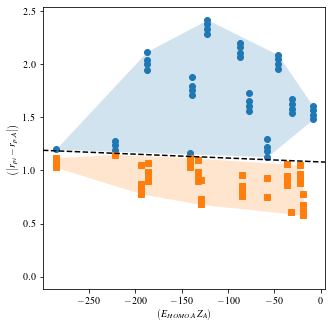

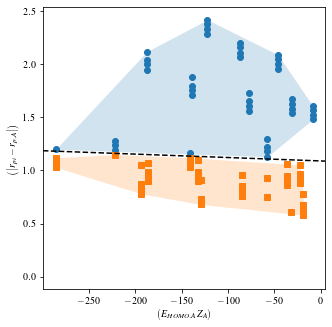

In [57]:
from sissopp.postprocess.plot.classification import plot_classification
plot_classification("models/train_dim_2_model_0.dat", filename="sissopp.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_1000.dat", filename="c_1000.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()

/tmp/ipykernel_2244/4020452072.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_classification("models/train_dim_2_model_0.dat", filename="sissopp.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
/tmp/ipykernel_2244/4020452072.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_classification("models/train_dim_2_model_0_c_1.dat", filename="c_1.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
/tmp/ipykernel_2244/4020452072.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_classification("models/train_dim_2_model_0_c_10.dat", filename="c_10.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
/tmp/ipykernel_2244/4020452072.py:5: UserWar

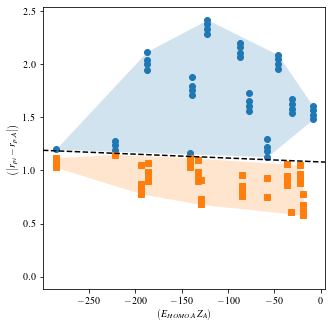

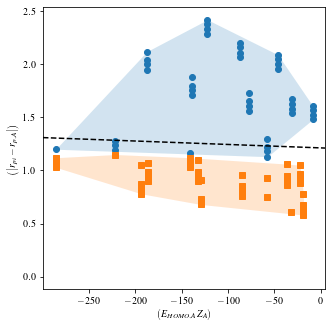

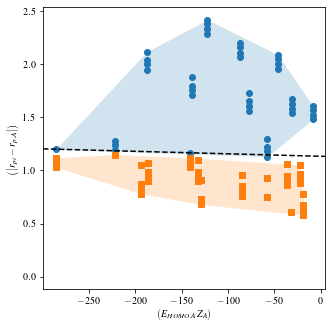

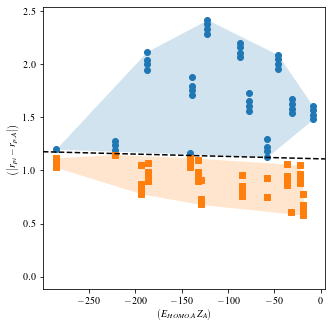

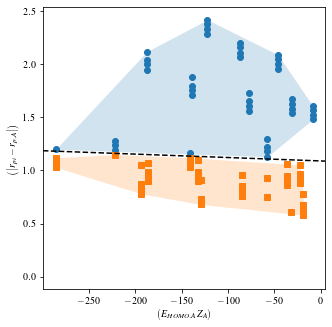

In [58]:
from sissopp.postprocess.plot.classification import plot_classification
plot_classification("models/train_dim_2_model_0.dat", filename="sissopp.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_1.dat", filename="c_1.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_10.dat", filename="c_10.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_100.dat", filename="c_100.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_1000.dat", filename="c_1000.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()